<a href="https://colab.research.google.com/github/lefreakcestchic1971/coviditaly/blob/master/CovidItaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-white')
root = "/content/drive/My Drive/Colab Notebooks/"
datadir = root + "Dataset/"



Costruiamo e visualizziamo un subset del dataset pubblicato dalla Protezione Civile al seguente [link](https://github.com/pcm-dpc/COVID-19/tree/master/dati-regioni) ed aggiornato quotidianamente

In [3]:
covid = pd.read_csv(datadir + "20200420.csv", sep=",", parse_dates=True)
covid = covid.rename(columns={'data': 'date'})
covid['denominazione_regione'] = covid['denominazione_regione'].str.replace('-',' ')
covid

date stato  codice_regione  ... tamponi  note_it  note_en
0     2020-02-24T18:00:00   ITA              13  ...       5      NaN      NaN
1     2020-02-24T18:00:00   ITA              17  ...       0      NaN      NaN
2     2020-02-24T18:00:00   ITA               4  ...       1      NaN      NaN
3     2020-02-24T18:00:00   ITA              18  ...       1      NaN      NaN
4     2020-02-24T18:00:00   ITA              15  ...      10      NaN      NaN
...                   ...   ...             ...  ...     ...      ...      ...
1192  2020-04-20T17:00:00   ITA               9  ...  105857      NaN      NaN
1193  2020-04-20T17:00:00   ITA               4  ...   26211      NaN      NaN
1194  2020-04-20T17:00:00   ITA              10  ...   25562      NaN      NaN
1195  2020-04-20T17:00:00   ITA               2  ...    4799      NaN      NaN
1196  2020-04-20T17:00:00   ITA               5  ...  260810      NaN      NaN

[1197 rows x 19 columns]

Riorganizziamo il dataframe per esplicitare il numero di positivi e di deceduti per regione e per giorno, nonchè la percentuale di deceduti tra coloro che sono risultati positivi

In [4]:
italy_currently_positive = covid.pivot_table('totale_positivi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_currently_positive = italy_currently_positive.fillna(method='ffill')
italy_currently_positive = italy_currently_positive.fillna(0)
italy_currently_positive = italy_currently_positive.iloc[:-1] #remove last row (Italia). If i wanted to remove last column I should do iloc[:, :-1]
italy_currently_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_new_positive = covid.pivot_table('nuovi_positivi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_new_positive = italy_new_positive.fillna(method='ffill')
italy_new_positive = italy_new_positive.fillna(0)
italy_new_positive = italy_new_positive.iloc[:-1] #remove last row (Italia). If i wanted to remove last column I should do iloc[:, :-1]
italy_new_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_dead = covid.pivot_table('deceduti', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_dead = italy_dead.fillna(method='ffill')
italy_dead = italy_dead.fillna(0)
italy_dead = italy_dead.iloc[:-1] 
italy_dead.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_total_positive = covid.pivot_table('totale_casi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_total_positive = italy_total_positive.fillna(method='ffill')
italy_total_positive = italy_total_positive.fillna(0)
italy_total_positive = italy_total_positive.iloc[:-1] 
italy_total_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_tested = covid.pivot_table('tamponi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_tested = italy_tested.fillna(method='ffill')
italy_tested = italy_tested.fillna(0)
italy_tested = italy_tested.iloc[:-1] 
italy_tested.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_hospitalized = covid.pivot_table('totale_ospedalizzati', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_hospitalized = italy_hospitalized.fillna(method='ffill')
italy_hospitalized = italy_hospitalized.fillna(0)
italy_hospitalized = italy_hospitalized.iloc[:-1] 
italy_hospitalized.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_recovered = covid.pivot_table('dimessi_guariti', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_recovered = italy_recovered.fillna(method='ffill')
italy_recovered = italy_recovered.fillna(0)
italy_recovered = italy_recovered.iloc[:-1] 
italy_recovered.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_dead_vs_total = italy_dead/italy_total_positive
italy_dead_vs_total = italy_dead_vs_total.fillna(0)
italy_tested

denominazione_regione  Abruzzo  Basilicata  ...  Veneto   Italia
date                                        ...                 
2020-02-24T18:00:00          5           0  ...    2200     4324
2020-02-25T18:00:00          5           0  ...    3780     8623
2020-02-26T18:00:00         13           0  ...    4900     9587
2020-02-27T18:00:00         33           0  ...    6164    12014
2020-02-28T18:00:00         33           0  ...    7414    15695
2020-02-29T17:00:00         43          32  ...    8659    18661
2020-03-01T17:00:00         52          39  ...    9056    21127
2020-03-02T18:00:00         52          39  ...    9782    23345
2020-03-03T18:00:00         52          42  ...   10176    25856
2020-03-04T17:00:00         85          48  ...   10515    29837
2020-03-05T17:00:00         96          54  ...   11949    32362
2020-03-06T17:00:00         96          63  ...   13023    36359
2020-03-07T18:00:00        123          75  ...   14429    42062
2020-03-08T18:00:00        163         123  ...   15918    49937
2020-03-09T18:00:00        237         135  ...   15956    53826
2020-03-10T18:00:00        310         148  ...   16643    60761
2020-03-11T17:00:00        310         155  ...   21400    73154
2020-03-12T17:00:00        867         155  ...   23438    86011
2020-03-13T17:00:00        958         155  ...   25691    97488
2020-03-14T17:00:00       1232         155  ...   26980   109170
2020-03-15T17:00:00       1419         208  ...   32546   124899
2020-03-16T17:00:00       1533         230  ...   35052   137962
2020-03-17T17:00:00       1688         262  ...   35478   148657
2020-03-18T17:00:00       2054         262  ...   40841   165541
2020-03-19T17:00:00       2409         353  ...   44658   182777
2020-03-20T17:00:00       2695         443  ...   49288   206886
2020-03-21T17:00:00       3035         522  ...   53642   233222
2020-03-22T17:00:00       3375         643  ...   57671   258402
2020-03-23T17:00:00       3674         696  ...   61115   275468
2020-03-24T17:00:00       4294         744  ...   66178   296964
2020-03-25T17:00:00       4982         857  ...   70877   324445
2020-03-26T17:00:00       5488        1046  ...   79759   361060
2020-03-27T17:00:00       6109        1254  ...   83627   394079
2020-03-28T17:00:00       7003        1421  ...   89380   429526
2020-03-29T17:00:00       7730        1585  ...   94784   454030
2020-03-30T17:00:00       7948        1833  ...   99941   477359
2020-03-31T17:00:00       8758        2043  ...  106238   506968
2020-04-01T17:00:00       9610        2262  ...  112746   541423
2020-04-02T17:00:00      10647        2427  ...  120320   581232
2020-04-03T17:00:00      11890        2622  ...  126490   619849
2020-04-04T17:00:00      12837        2765  ...  133289   657224
2020-04-05T17:00:00      13598        2931  ...  140910   691461
2020-04-06T17:00:00      14198        3061  ...  146288   721732
2020-04-07T17:00:00      14904        3160  ...  153542   755445
2020-04-08T17:00:00      15846        3296  ...  163247   807125
2020-04-09T17:00:00      16847        3474  ...  171456   853369
2020-04-10T17:00:00      18088        3696  ...  180700   906864
2020-04-11T17:00:00      19441        4050  ...  190912   963473
2020-04-12T17:00:00      20594        4355  ...  198442  1010193
2020-04-13T17:00:00      20667        4545  ...  203077  1046910
2020-04-14T17:00:00      20935        4759  ...  208878  1073689
2020-04-15T17:00:00      22500        5037  ...  216344  1117404
2020-04-16T17:00:00      23786        5349  ...  224549  1178403
2020-04-17T17:00:00      25436        5710  ...  236722  1244108
2020-04-18T17:00:00      27016        6056  ...  247329  1305833
2020-04-19T17:00:00      27791        6528  ...  255797  1356541
2020-04-20T17:00:00      27942        6868  ...  260810  1398024

[57 rows x 22 columns]

Nella seguente grafica viene rappresentata la dinamica temporale degli attualmente positivi, quindi il totale dei positivi (compresi i nuovo positivi) meno i deceduti ed i guariti, regione per regione, evidenziando i deceduti con un colore più scuro

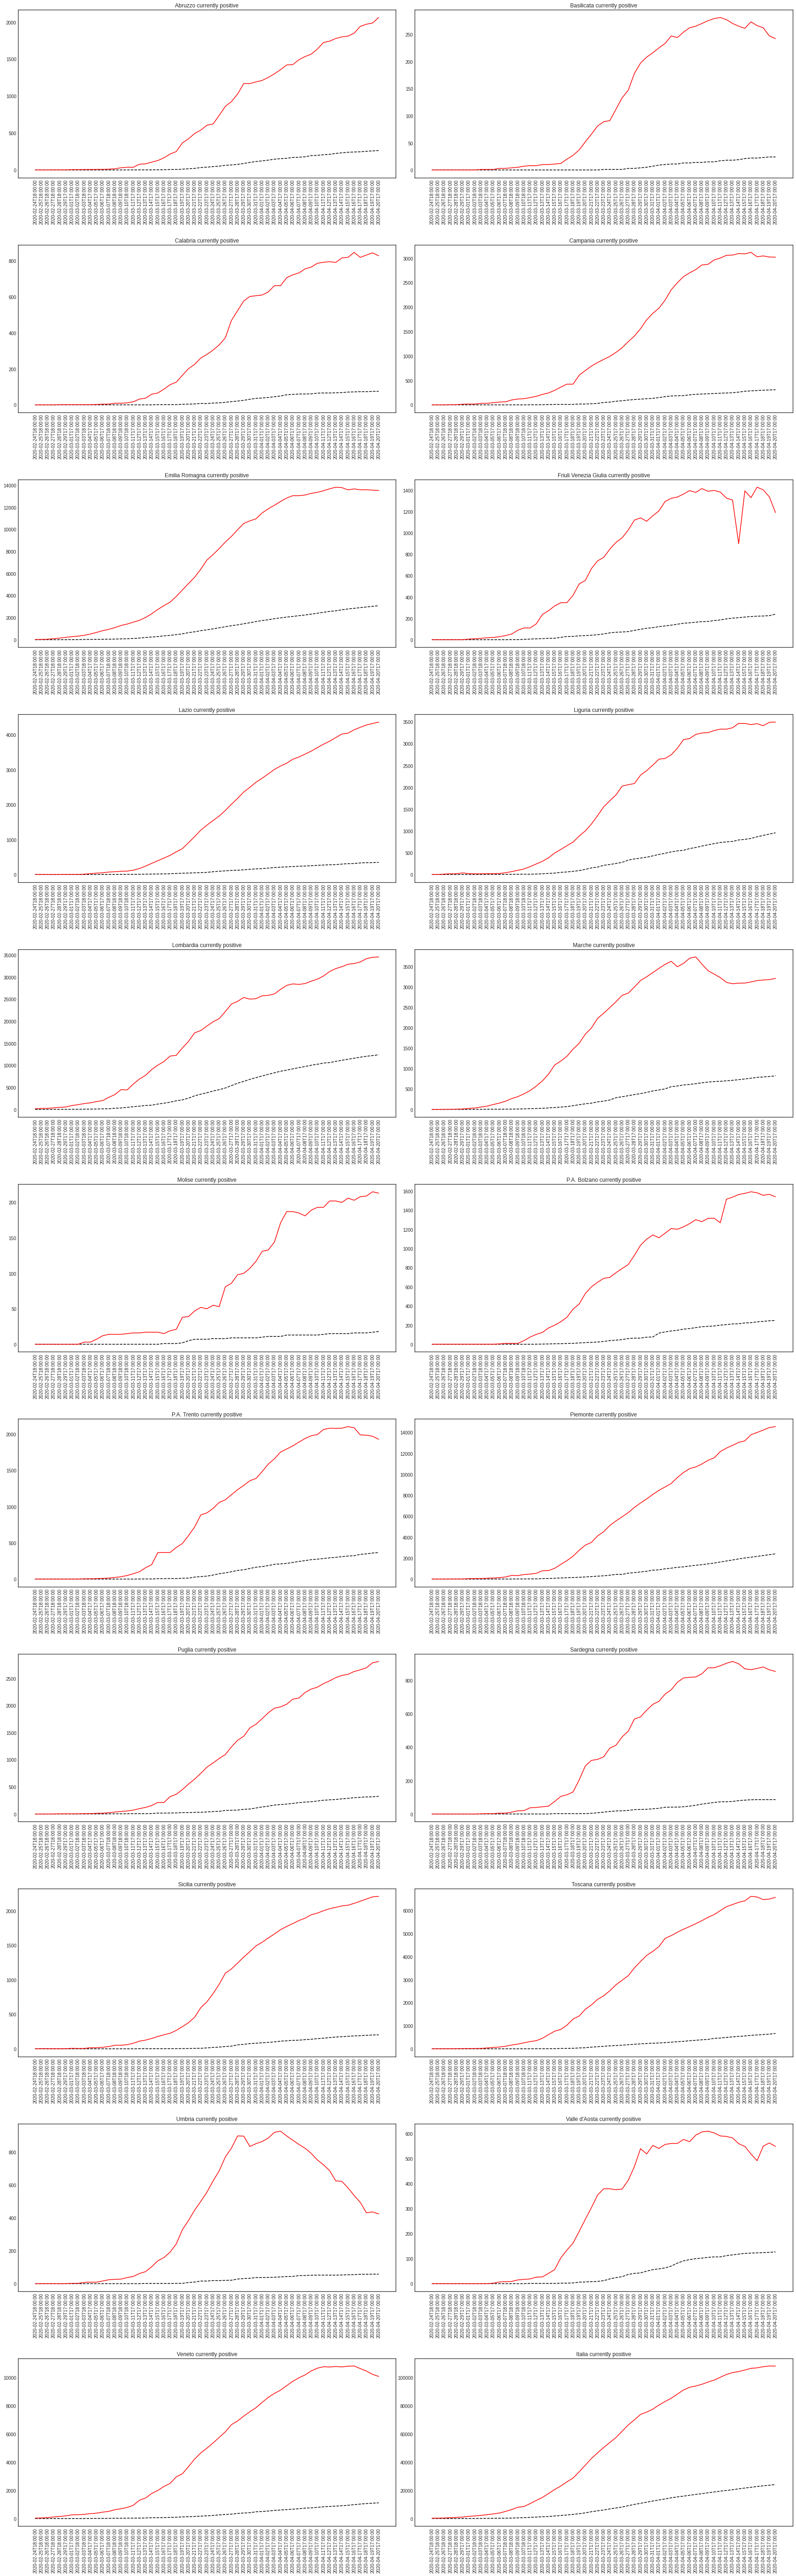

In [5]:
columns = list(italy_dead)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_positive = italy_currently_positive[[region]]
    region_positive.columns = ['Positive']
    region_dead = italy_dead[[region]]
    region_dead.columns = ['Dead']
    ax.plot(region_dead.index, region_dead.Dead, '--k')
    ax.plot(region_positive.index, region_positive['Positive'], '-r')
    ax.set_title(region + ' currently positive')
    ax.set_xticklabels(region_positive.index,rotation=90)
    i=i+1


Il numero di positivi assoluto è ancora in aumento ovunque tranne poche regioni, Umbria, Marche e Friuli ma vediamo più avanti qual è l'incidenza su questi dati del numero di tamponi eseguiti 
 
Segue una comparazione tra regioni relativa al numero di attualmente positivi

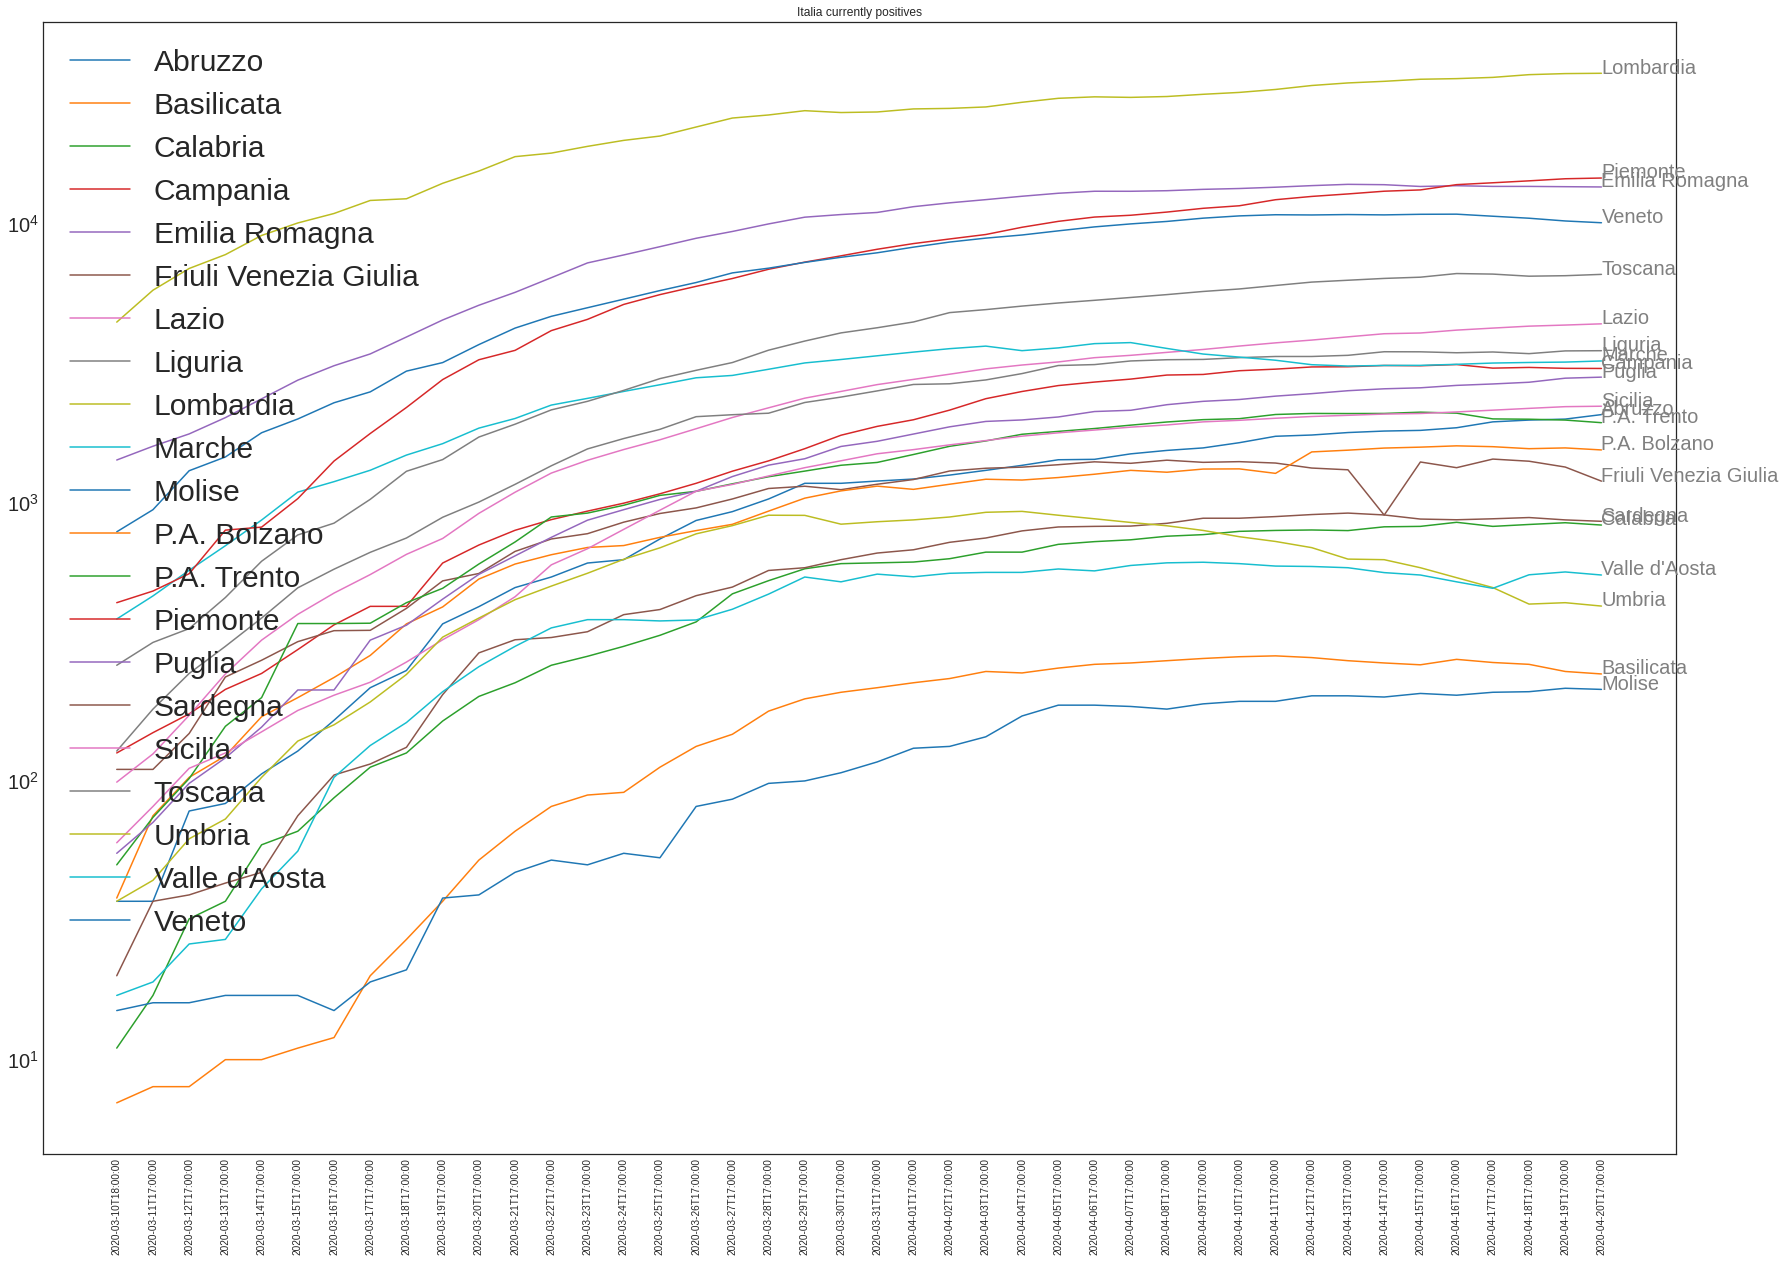

In [6]:
style = dict(size=20, color='gray')
columns = list(italy_dead)
last_day = covid['date'].max()
first_interesting = 15
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
for region in columns: 
    if (region != 'Italia'):
        region_positive = italy_currently_positive[[region]]
        region_positive = region_positive[first_interesting:]
        region_positive.columns = ['Positive']
        ax.plot(region_positive.index, region_positive['Positive'], label=region)
        ax.text(italy_currently_positive.shape[0]-first_interesting-1, region_positive.loc[last_day, 'Positive'], region, **style)

ax.set_title(region + ' currently positives')
ax.set_xticklabels(region_positive.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('log')
plt.legend(loc="upper left", prop={'size': 30})


Normalizziamo i dati rispetto alla popolazione di ogni regione

In [0]:
 #source: https://www.tuttitalia.it/regioni/
population_density = pd.DataFrame([
              {'denominazione_regione': 'Abruzzo', 'density': 121, 'population': 1311580},
              {'denominazione_regione': 'Basilicata', 'density': 56, 'population': 562869},
              {'denominazione_regione': 'Calabria', 'density': 128, 'population': 1947131},
              {'denominazione_regione': 'Campania', 'density': 424, 'population': 5801692},
              {'denominazione_regione': 'Emilia Romagna', 'density': 199, 'population': 4459477},
              {'denominazione_regione': 'Friuli Venezia Giulia', 'density': 153, 'population': 1215220},
              {'denominazione_regione': 'Lazio', 'density': 341, 'population': 5879082},
              {'denominazione_regione': 'Liguria', 'density': 286, 'population': 1550640},
              {'denominazione_regione': 'Lombardia', 'density': 422, 'population': 10060574},
              {'denominazione_regione': 'Marche', 'density': 162, 'population': 1525271},
              {'denominazione_regione': 'Molise', 'density': 69, 'population': 305617},
              {'denominazione_regione': 'P.A. Bolzano', 'density': 79, 'population': 536137},
              {'denominazione_regione': 'P.A. Trento', 'density': 79, 'population': 536137},
              {'denominazione_regione': 'Piemonte', 'density': 172, 'population': 4356406},
              {'denominazione_regione': 'Puglia', 'density': 206, 'population': 4029053},
              {'denominazione_regione': 'Sardegna', 'density': 68, 'population': 1639591},
              {'denominazione_regione': 'Sicilia', 'density': 194, 'population': 4999891},
              {'denominazione_regione': 'Toscana', 'density': 162, 'population': 3729641},
              {'denominazione_regione': 'Umbria', 'density': 104, 'population': 882015},
              {'denominazione_regione': 'Valle d\'Aosta', 'density': 39, 'population': 125666},
              {'denominazione_regione': 'Veneto', 'density': 267, 'population': 4905854}
            ])

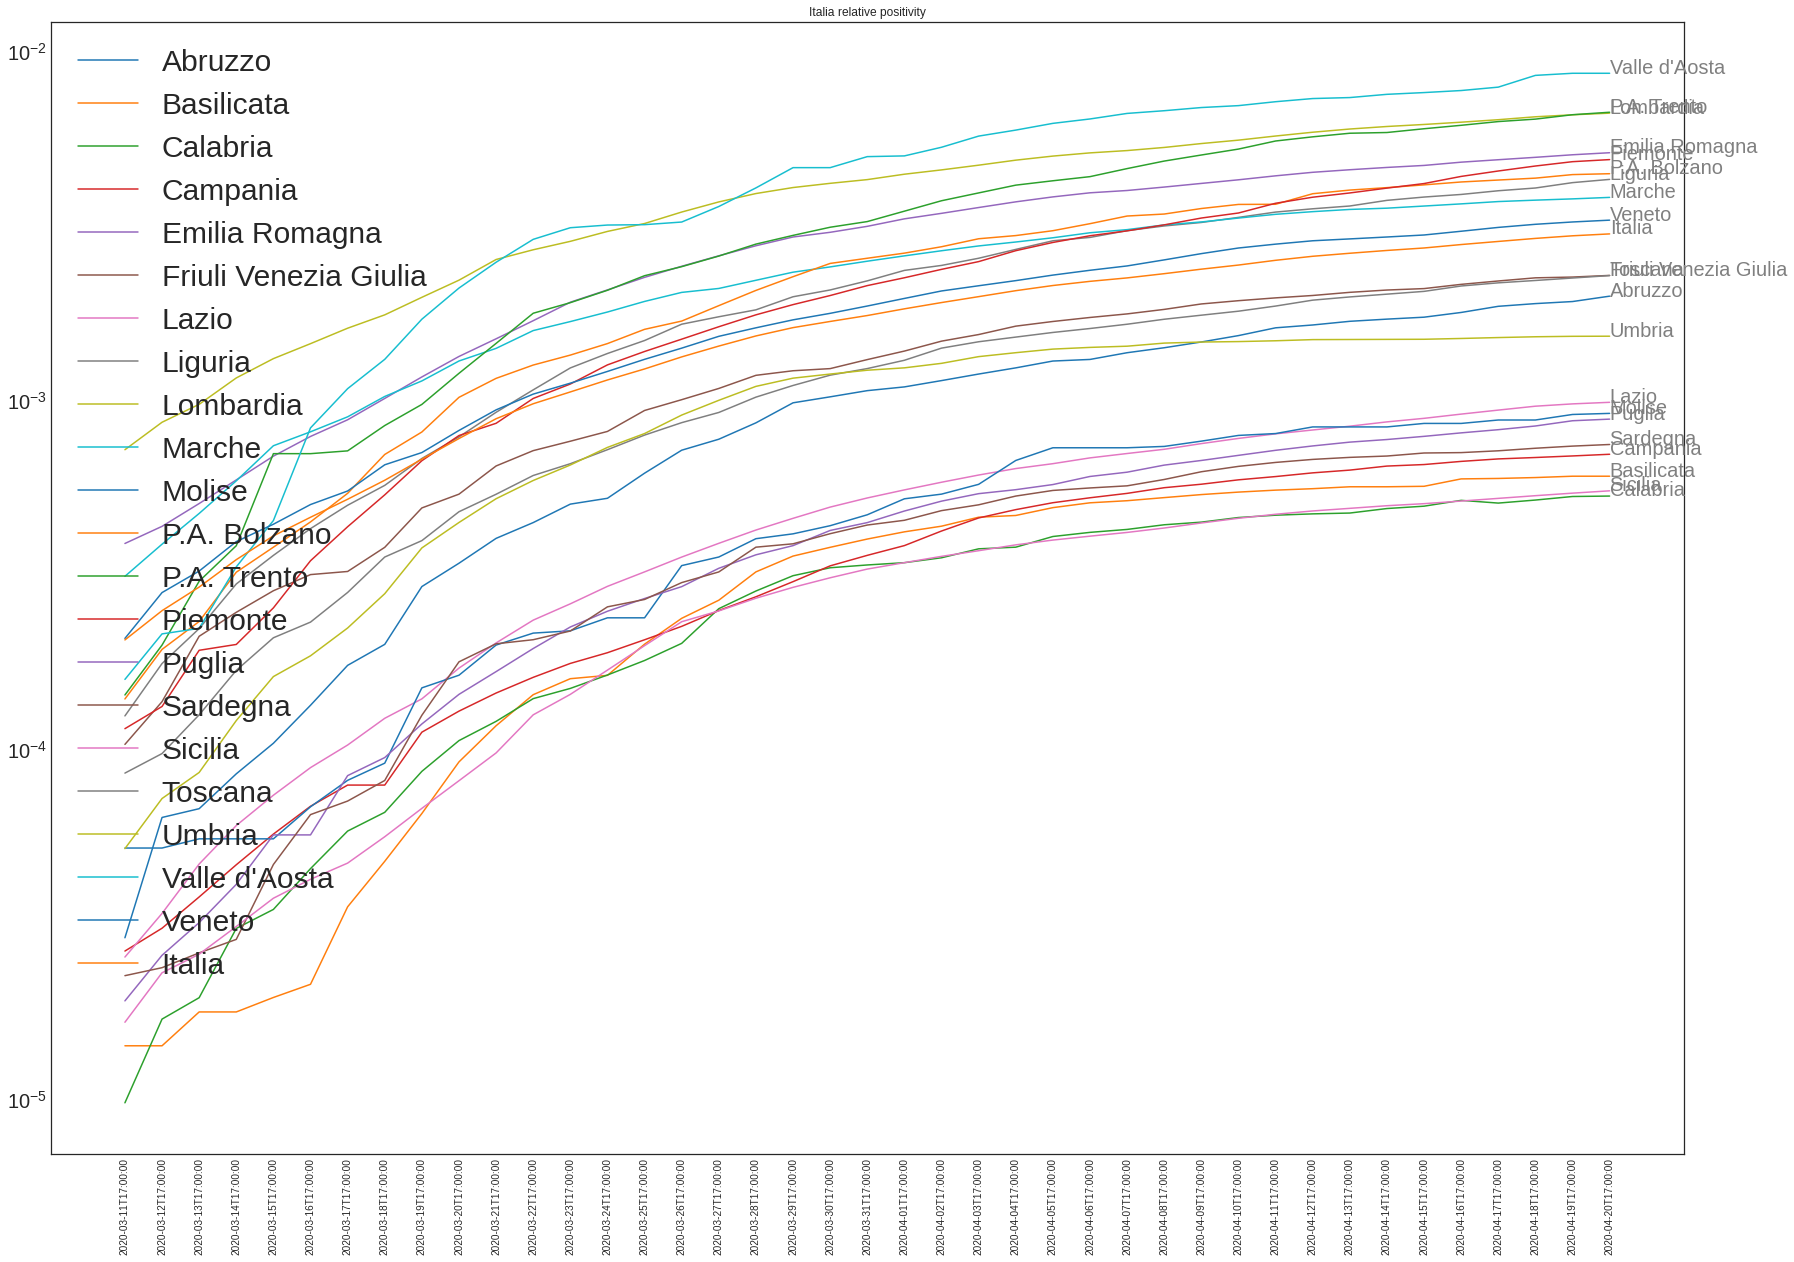

In [8]:
style = dict(size=20, color='gray')
columns = list(italy_total_positive)
last_day = covid['date'].max()
italy_total_positive_normalized = italy_total_positive.copy()
tempdf = pd.DataFrame([{'denominazione_regione': 'Italia', 'population': population_density['population'].sum()}])
population = population_density[['denominazione_regione', 'population']]
population = population.append(tempdf, ignore_index = True)
population_pivot = population.pivot_table('population', columns='denominazione_regione')
first_interesting = 16
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    region_relative_positivity = italy_total_positive[region]/population_pivot.loc['population', region]
    region_relative_positivity = region_relative_positivity[first_interesting:]
    ax.plot(region_relative_positivity.index, region_relative_positivity, label=region)
    ax.text(italy_total_positive.shape[0]-first_interesting-1, region_relative_positivity.loc[last_day], region, **style)
    i=i+1

ax.set_title(region + ' relative positivity')
ax.set_xticklabels(region_relative_positivity.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('log')
plt.legend(loc="upper left", prop={'size': 30})

La Valle d\'Aosta continua ad essere la regione con la maggior densità di contagiati ufficiali

Mentre la curva dei totali positivi (quindi comprensiva di guariti e deceduti) avrà un andamento sigmoidale, ossia tipo questo:


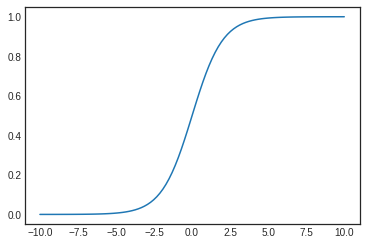

In [9]:
x = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-x))
plt.plot(x, y)
plt.show()

... ci si aspetta che quella degli attualmente positivi raggiunga un picco per poi quindi scendere, magari con una discesa più lenta rispetto alla salita, ed infine tendere a zero: 

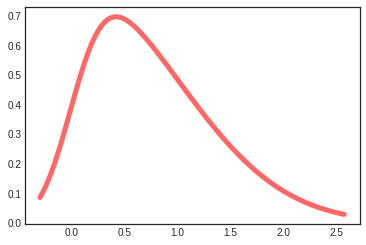

In [10]:
from scipy.stats import skewnorm
fig, ax = plt.subplots(1, 1)
a = 4
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a), 'r-', lw=5, alpha=0.6, label='skewnorm pdf')

Grazie al lockdown il picco effettivo è stato più basso e più lontano nel tempo rispetto a quello che si sarebbe verificato senza interventi, secondo quanto descritto in questo [studio](https://www.visualcapitalist.com/infection-trajectory-flattening-the-covid19-curve/?fbclid=IwAR3KsS0FJgZPdCwoj0uw7qNO5bagm59eKdg85C12Wjw3T0w8mODXaX9iU8g)

Segue una comparazione tra regioni relativa al numero di deceduti, anch'essa rapportata alla popolazione

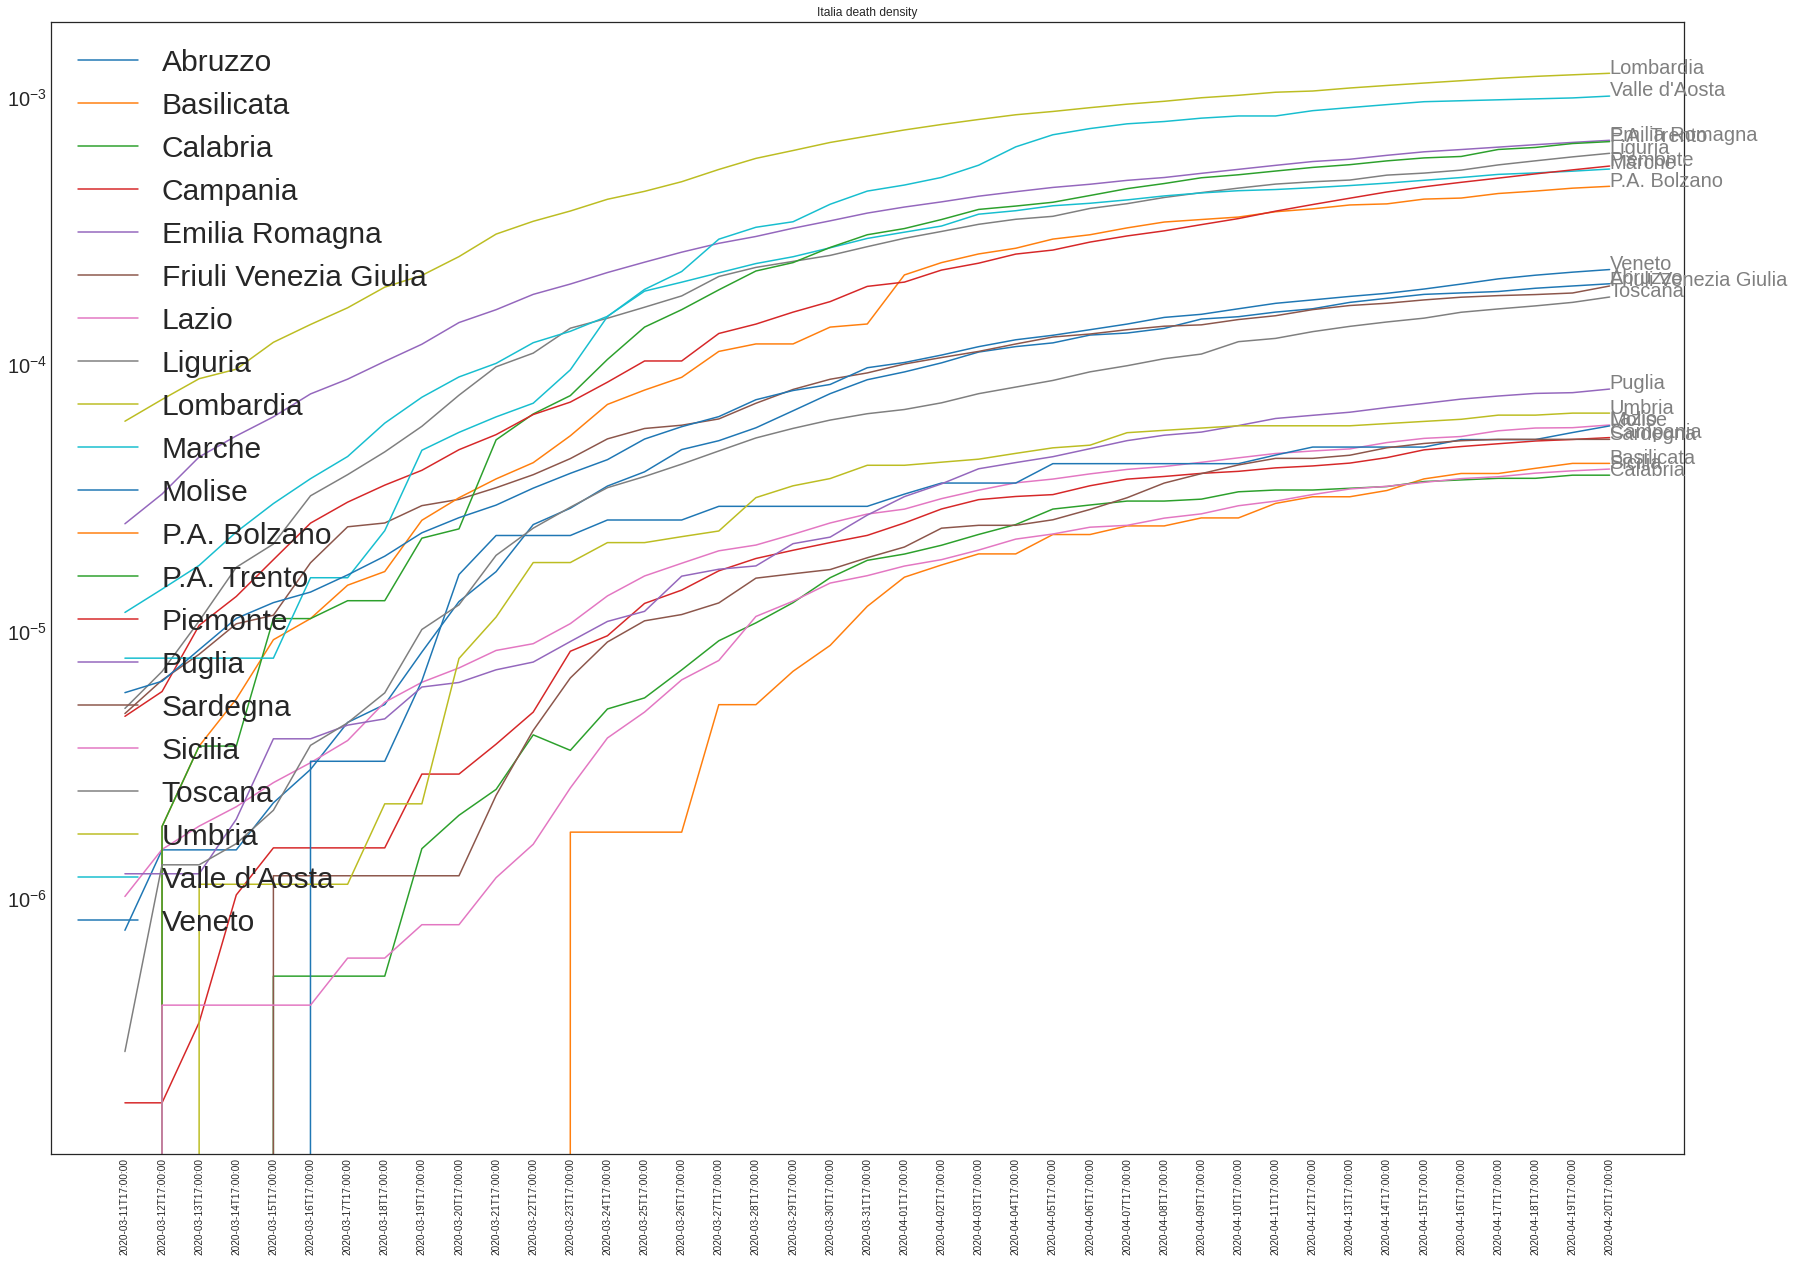

In [13]:
style = dict(size=20, color='gray')
columns = list(italy_dead)
last_day = covid['date'].max()
first_interesting = 16
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    if (region != 'Italia'):
        region_dead = italy_dead[[region]]/population_pivot.loc['population', region]
        region_dead = region_dead[first_interesting:]
        region_dead.columns = ['Dead']
        ax.plot(region_dead.index, region_dead['Dead'], label=region)
        ax.text(italy_dead.shape[0]-first_interesting-1, region_dead.loc[last_day, 'Dead'], region, **style)
        i=i+1

ax.set_title(region + ' death density')
ax.set_xticklabels(region_dead.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('log')
plt.legend(loc="upper left", prop={'size': 30})


Curiosamente si configurano quattro fasce ben distinte. In prima fascia Lombardia e Valle d\'Aosta.
Ricordiamo però le [considerazioni](https://www.repubblica.it/cronaca/2020/04/01/news/istat_dramma_cornavirus_al_nord-252910084/) dell'ISTAT secondo cui il numero di deceduti, soprattutto al Nord, supera di molto la media dello stesso periodo degli anni precedenti e supera la stessa cifra ufficiale indicata dalla Protezione Civile


Nella seguente grafica viene rappresentata l'istantanea del rapporto tra deceduti e totali positivi su tutte le regioni, giorno per giorno, con media mobile a 3 giorni


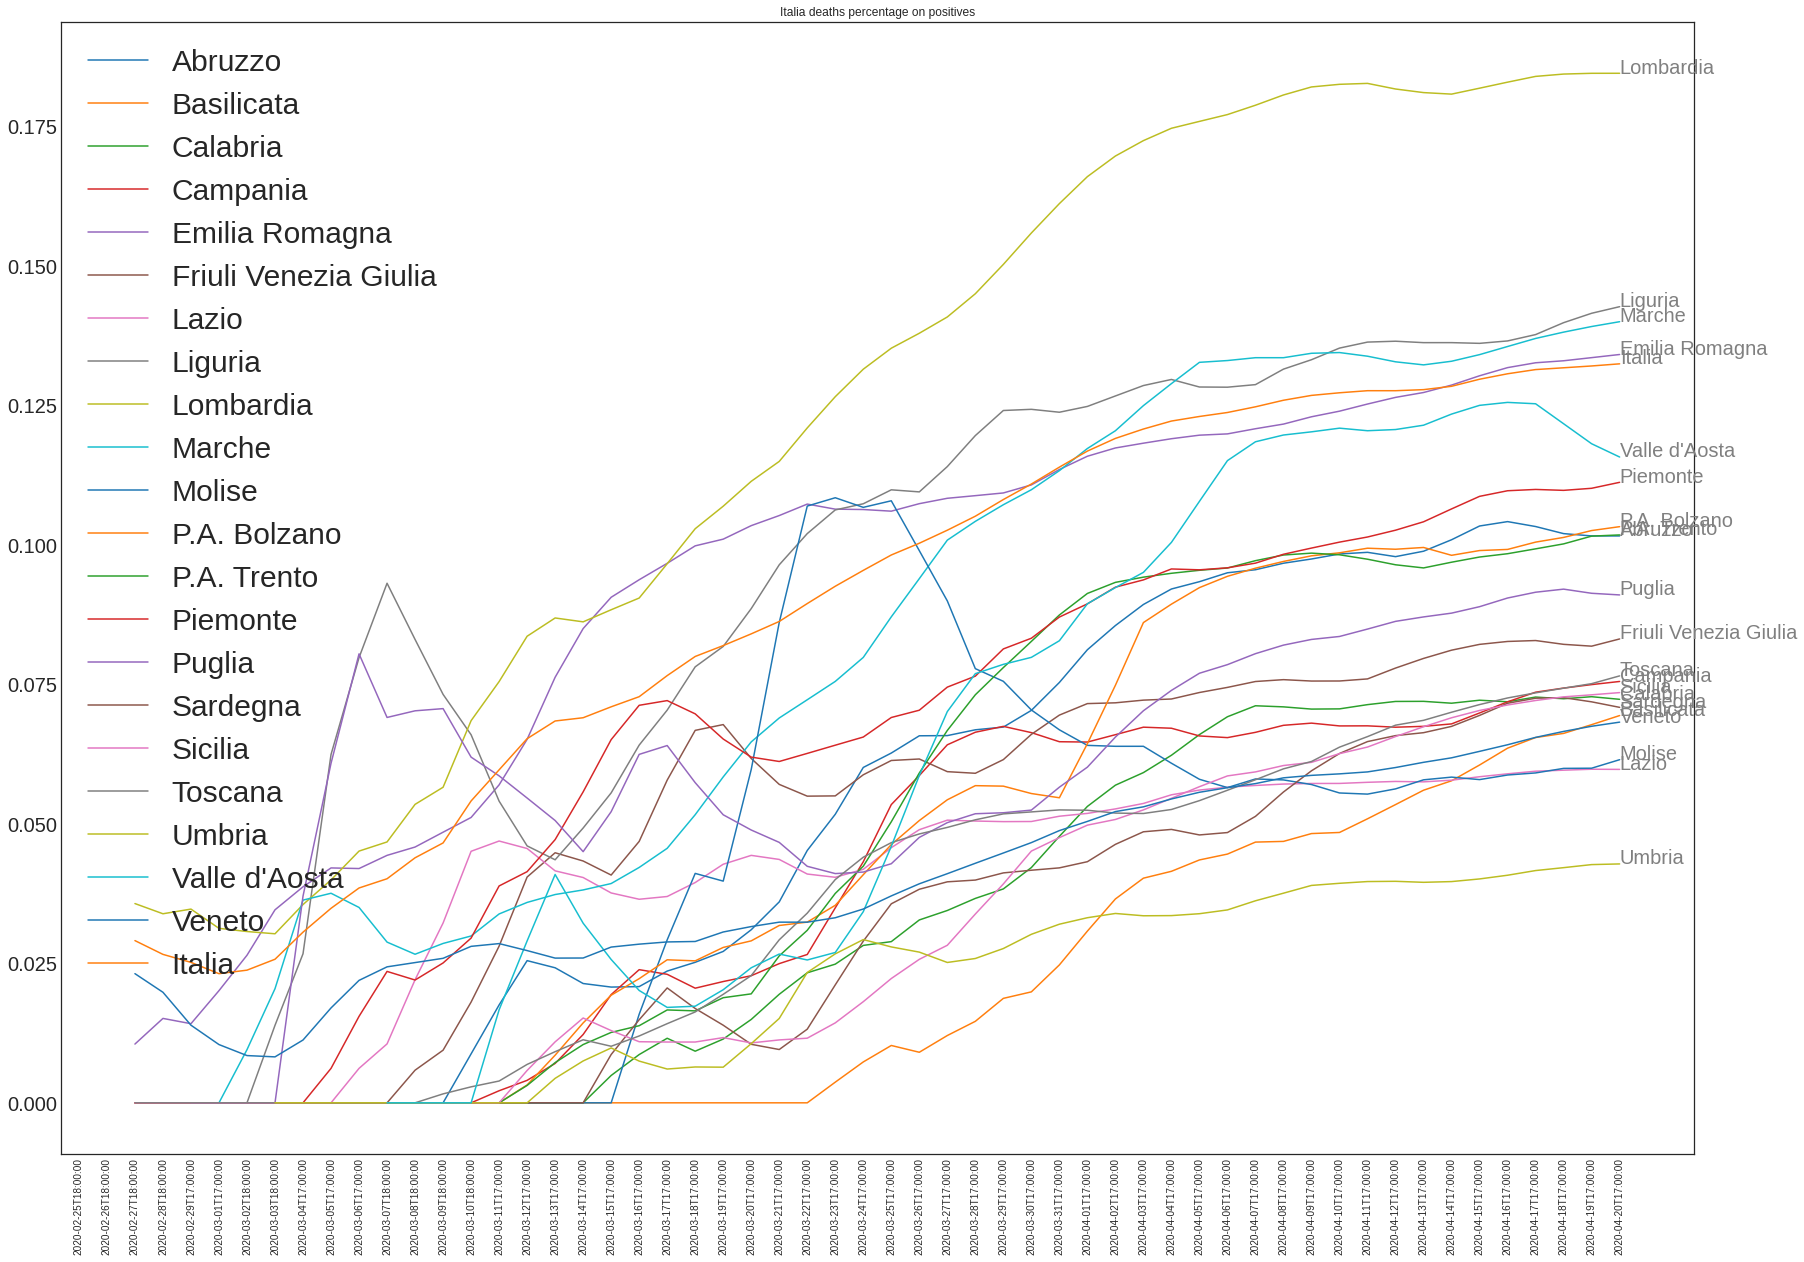

In [12]:
italy_dead_vs_total = italy_dead/italy_total_positive
style = dict(size=20, color='gray')
columns = list(italy_dead_vs_total)
last_day = covid['date'].max()
first_interesting = 1
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    region_dead = italy_dead_vs_total[[region]]
    region_dead = region_dead[first_interesting:]
    region_dead.columns = ['Dead_percentage']
    ax.plot(region_dead.index, region_dead['Dead_percentage'].rolling(window=3).mean(), label=region)
    ax.text(italy_dead_vs_total.shape[0]-first_interesting-1, region_dead.rolling(window=3).mean().loc[last_day, 'Dead_percentage'], region, **style)
    i=i+1

ax.set_title(region + ' deaths percentage on positives')
ax.set_xticklabels(region_dead.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})


Anche se i valori reali saranno maggiori, la Lombardia rimane di gran lunga la regione dove il Coronavirus ha ucciso di più. Anche Liguria e Marche sopra la media nazionale.

Si ravvisano differenze anche di un ordine di grandezza tra Umbria (la regione meno "letale") e la Lombardia


Ma l'analisi più interessante è quella del rapporto tra numero di attualmente positivi e numero di tamponi effettuati, dato più realistico in quanto il numero di casi testati è la "popolazione" di riferimento. Un numero o un incremento anomalo del numero di positivi in una regione può essere fuorviante perchè dovuto ad un aumento dei test eseguiti

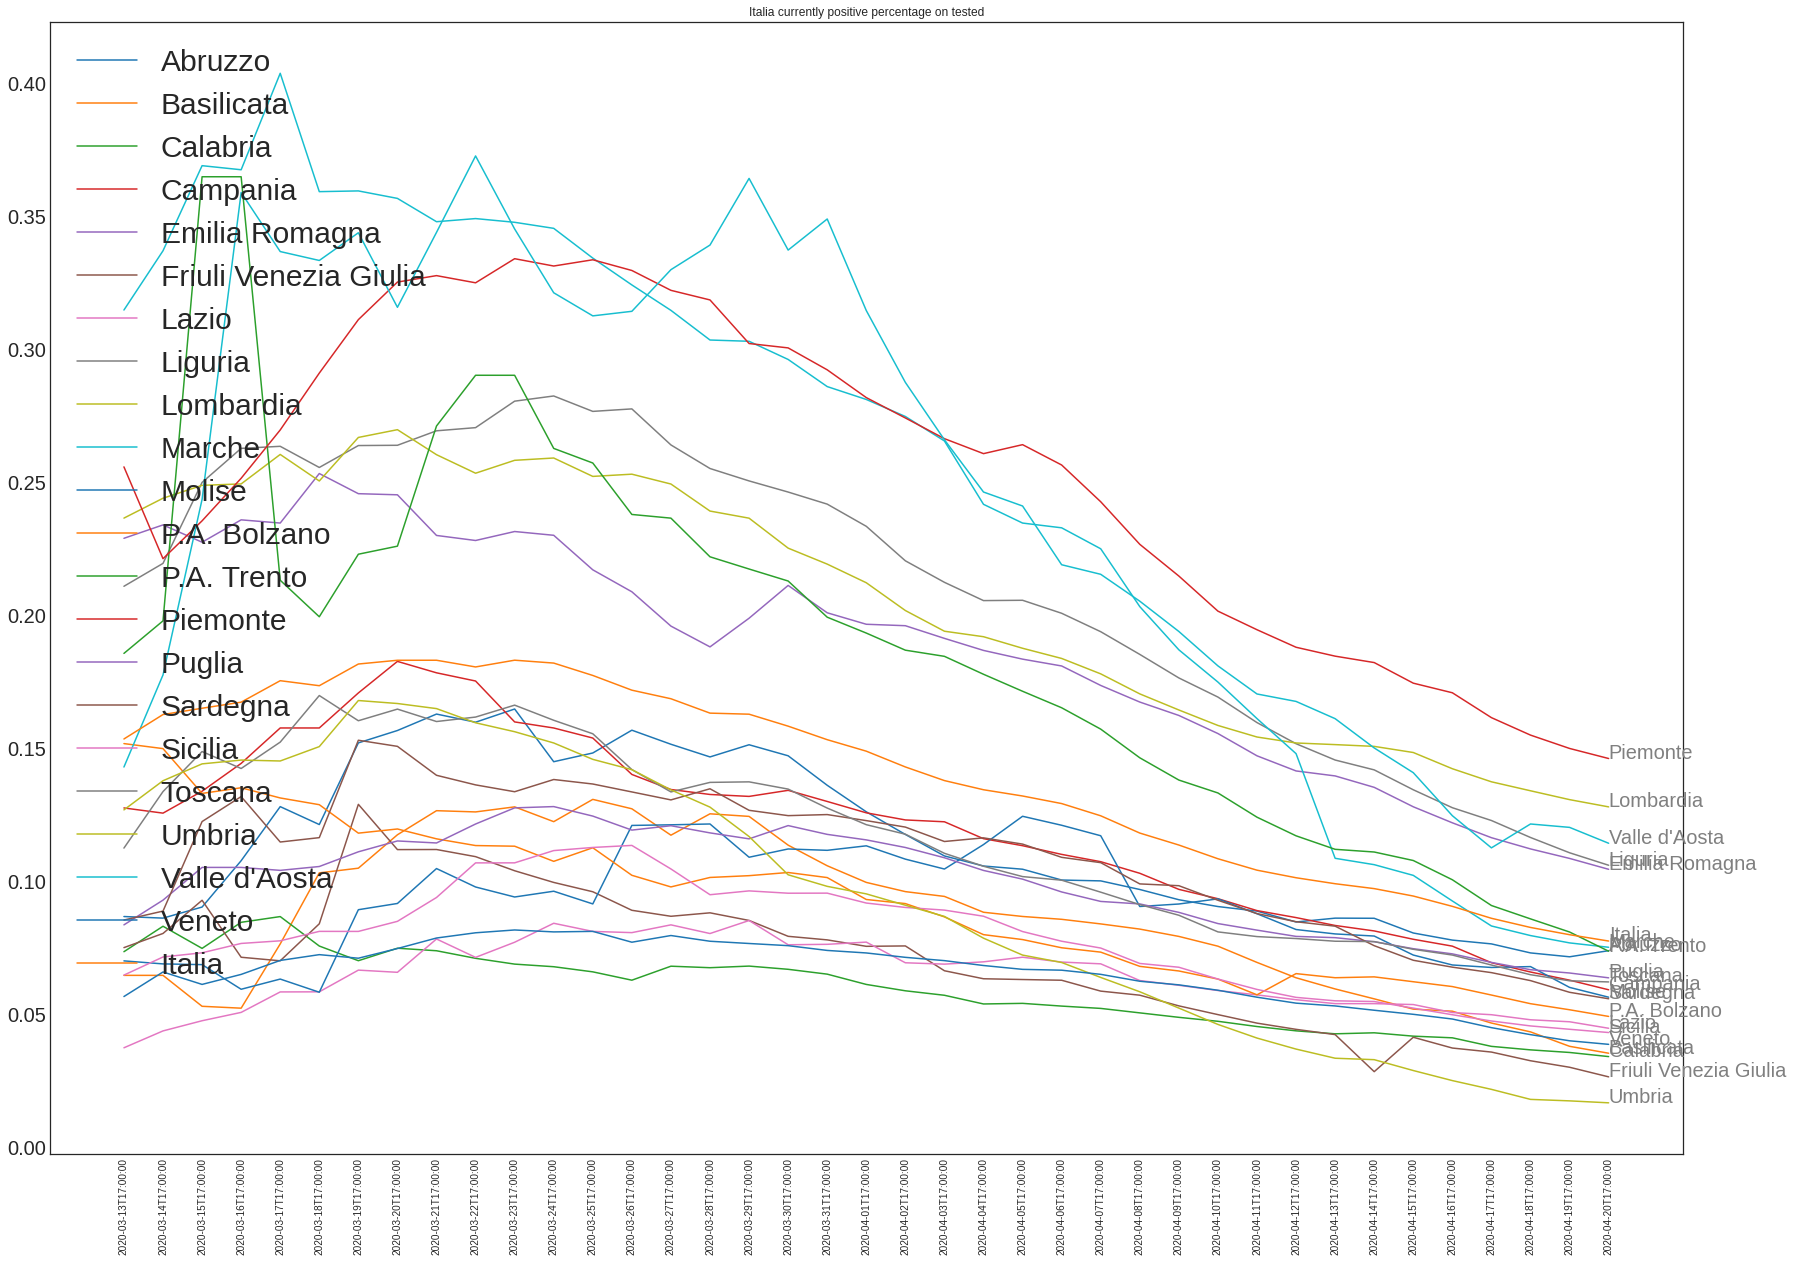

In [14]:
style = dict(size=20, color='gray')
columns = list(italy_tested)
last_day = covid['date'].max()
first_interesting = 18
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
for region in columns: 
    region_positive_vs_tested = italy_currently_positive[[region]]/italy_tested[[region]]
    region_positive_vs_tested = region_positive_vs_tested[first_interesting:]
    ax.plot(region_positive_vs_tested.index, region_positive_vs_tested, label=region)
    ax.text(italy_currently_positive.shape[0]-first_interesting-1, region_positive_vs_tested.loc[last_day], region, **style)

ax.set_title(region + ' currently positive percentage on tested')
ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})

Considerando quindi il numero di test eseguiti il picco sembra stato globalmente superato il 24/3. In seguito calo generalizzato, più deciso dove il tasso era più alto. Agli estremi Umbria, con circa lo il 2.5% di test positivi ed il Piemonte con il 15%. Anche Lombardia, Liguria, Valle d'Aosta ed Emilia Romagna sopra la media.

Vediamo la dinamica del fenomeno con una media mobile a 4 giorni, dal momento che i dati grezzi mostrano un'oscillazione con periodo giornaliero.

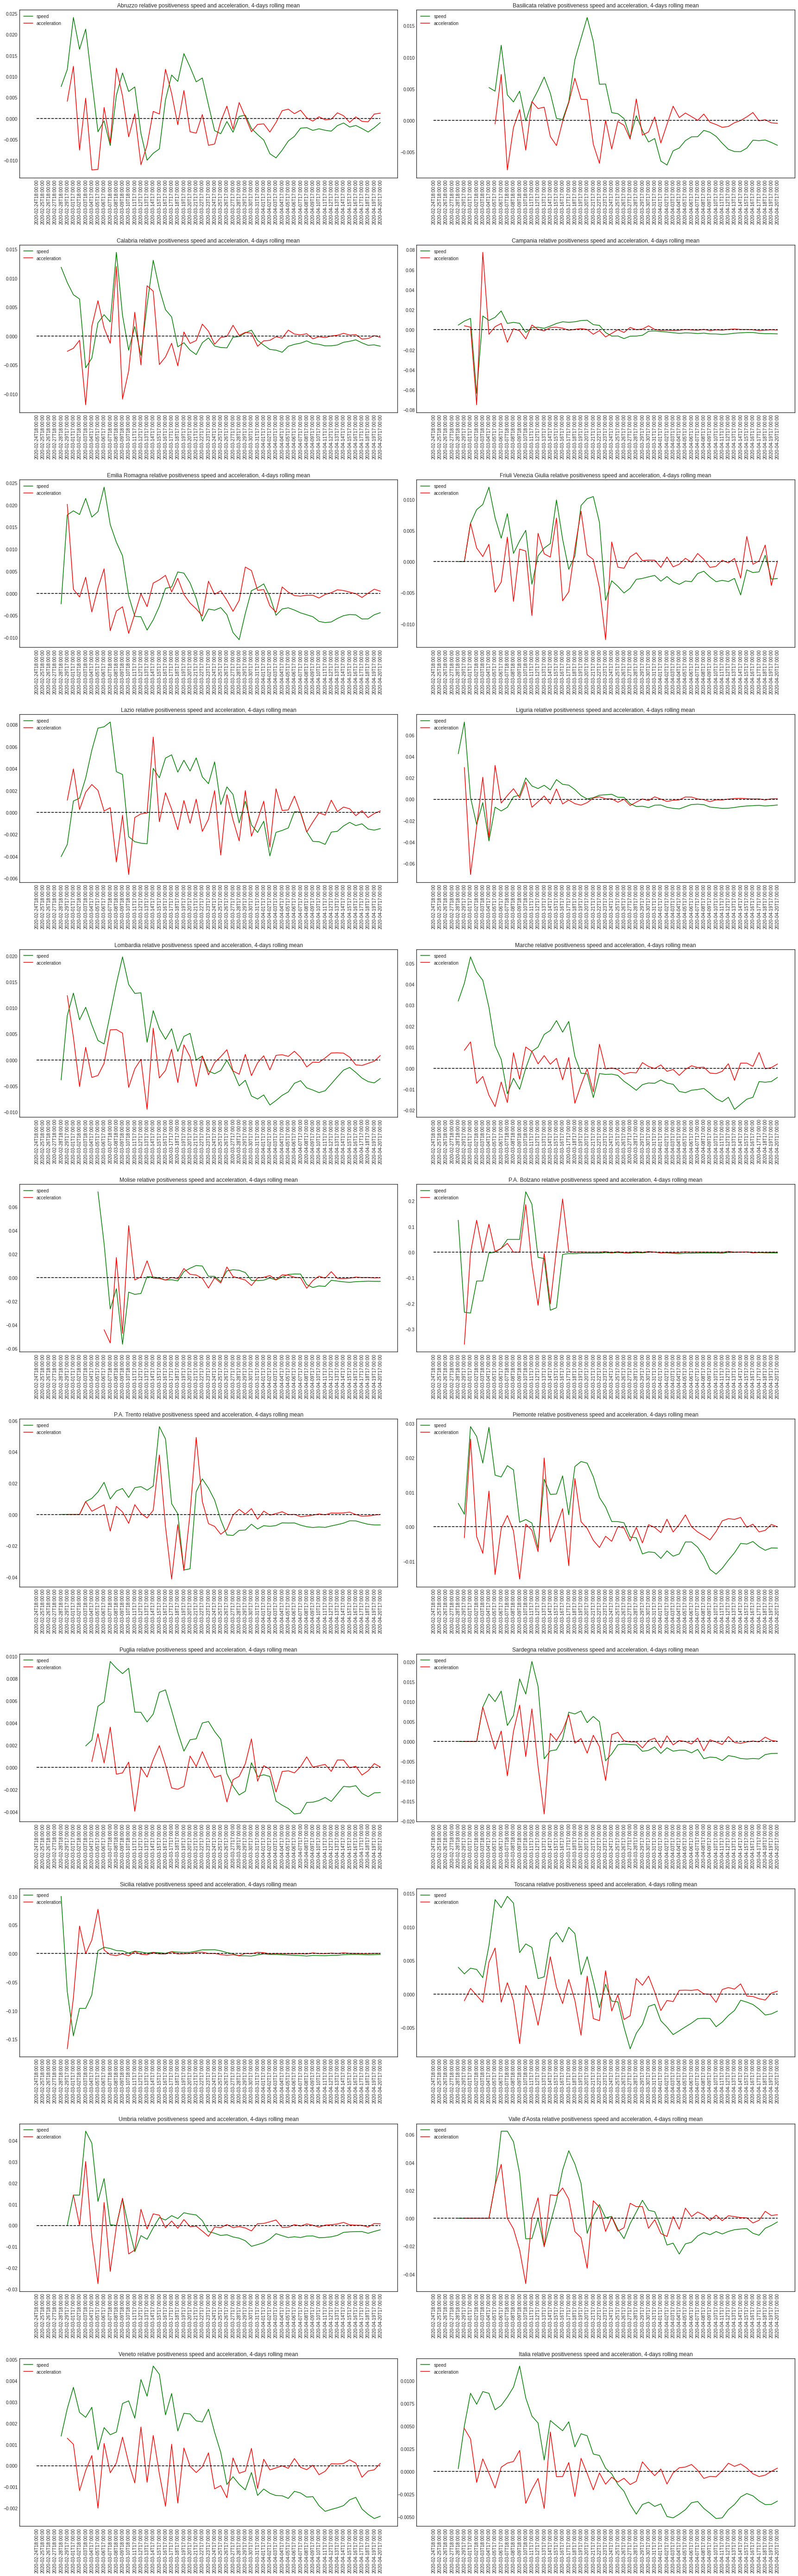

In [16]:
columns = list(italy_tested)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_positive_vs_tested = italy_currently_positive[[region]]/italy_tested[[region]]
    region_positive_vs_tested.columns = ['Positive']
    ax.plot(region_positive_vs_tested.index, region_positive_vs_tested['Positive'].rolling(window=4).mean().diff(), '-g', label='speed')
    ax.set_title(region + ' currently positive delta')
    ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
    ax.plot(region_positive_vs_tested.index, region_positive_vs_tested['Positive'].rolling(window=4).mean().diff().diff(), '-r', label='acceleration')
    ax.plot(region_positive_vs_tested.index, np.zeros(region_positive_vs_tested.index.size), '--k')
    ax.set_title(region + ' relative positiveness speed and acceleration, 4-days rolling mean')
    ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
    ax.legend(loc='upper left', frameon=False)
    i=i+1


Lentissime le discese di Abruzzo, Calabria, Campania, Liguria, Trentino Alto Adige e Sicilia.

Visti i dati cumulativi vediamo quelli istantanei

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


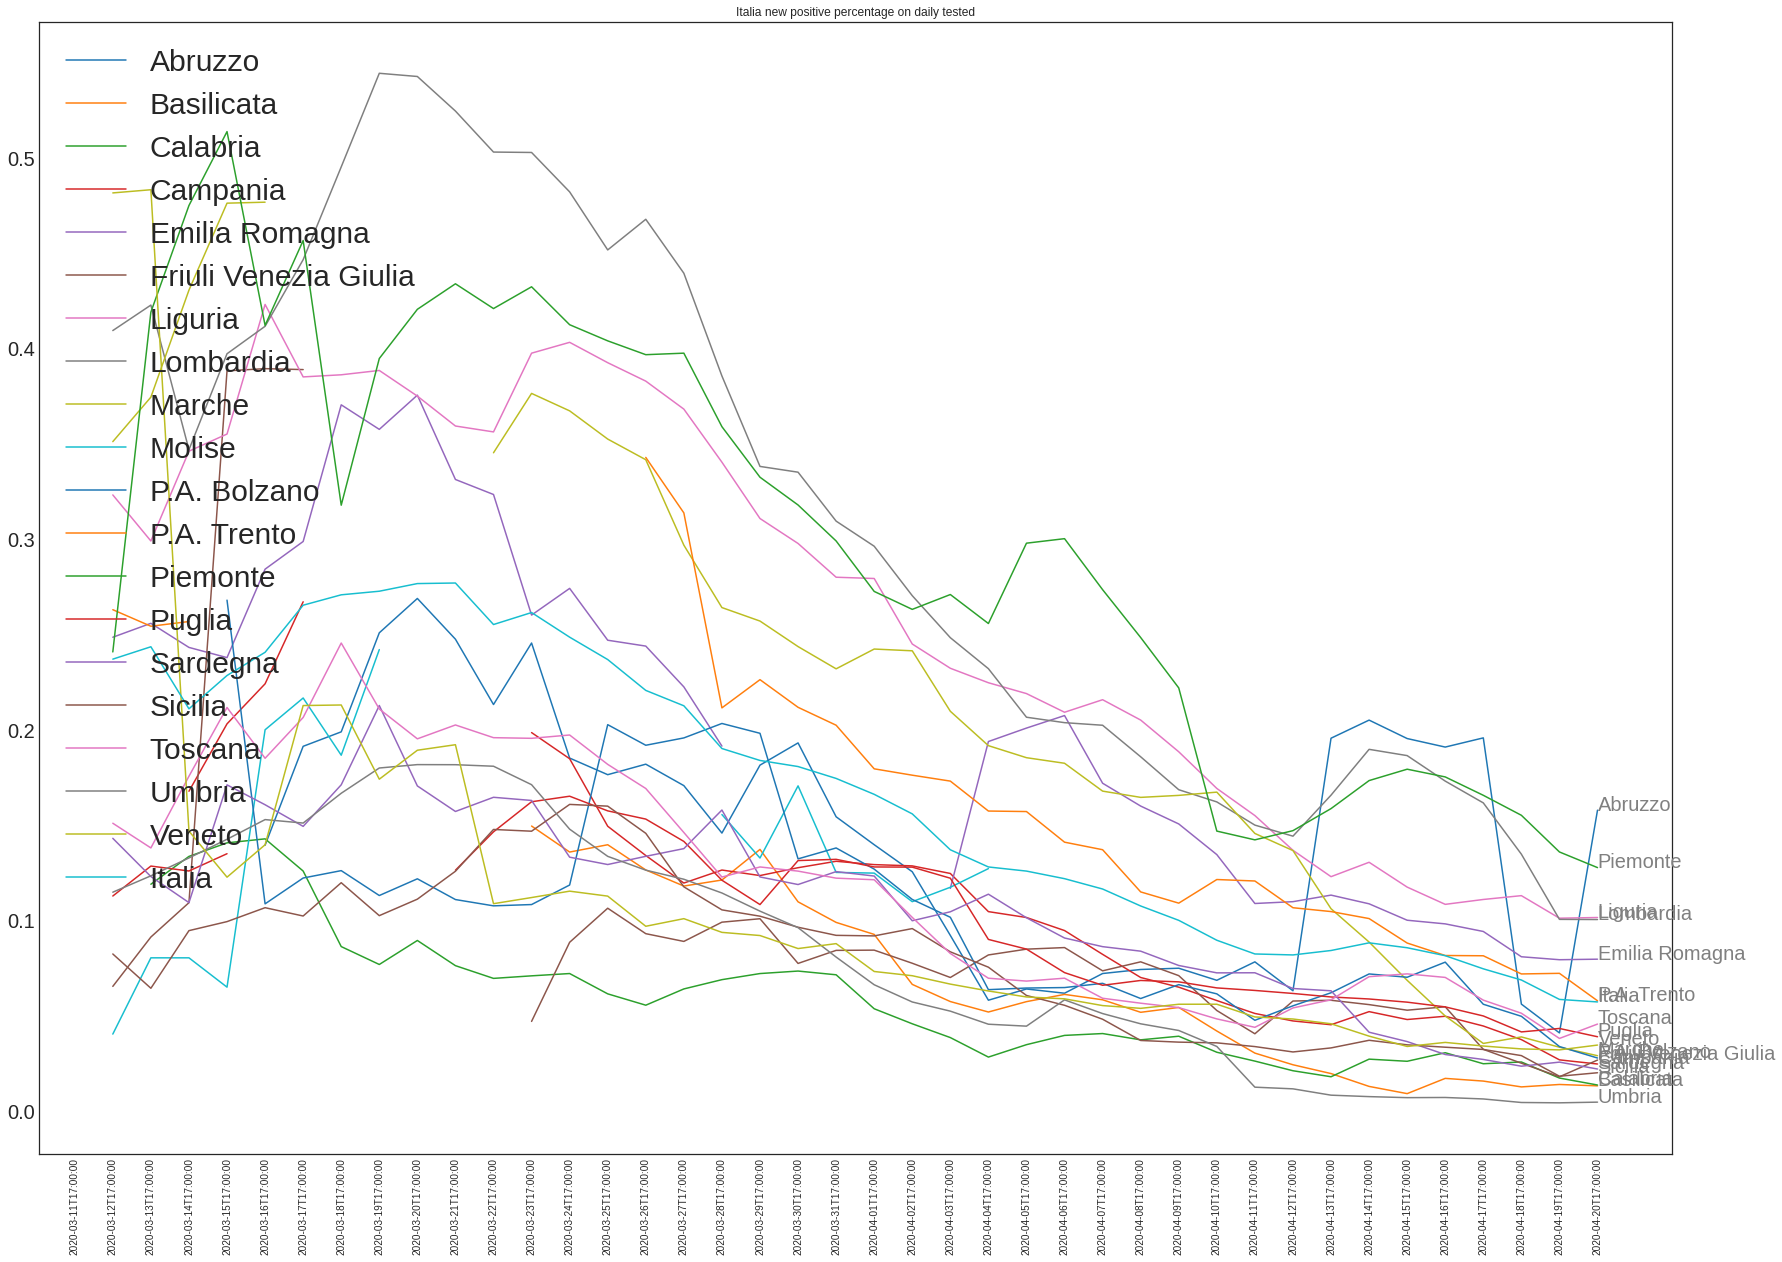

In [17]:
style = dict(size=20, color='gray')
columns = list(italy_tested)
last_day = covid['date'].max()
first_interesting = 13
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
for region in columns: 
  if (region!='Valle d\'Aosta') and (region!='Lazio'):
        region_positive_vs_tested = italy_new_positive[[region]]/italy_tested[[region]].diff()
        region_positive_vs_tested = region_positive_vs_tested[first_interesting:]
        ax.plot(region_positive_vs_tested.index, region_positive_vs_tested.rolling(window=5).mean(), label=region)
        ax.text(italy_new_positive.shape[0]-first_interesting-1, region_positive_vs_tested.rolling(window=5).mean().loc[last_day], region, **style)

ax.set_title(region + ' new positive percentage on daily tested')
ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})

Da circa una settimana l'Abruzzo è tendenzialmente la regione col maggior numero di positivi in rapporto al numero di tamponi eseguiti, seguita da Lombardia e Piemonte.

Prosegue lo stallo  del trend di discesa

Vediamo anche il dato splittato regione per regione

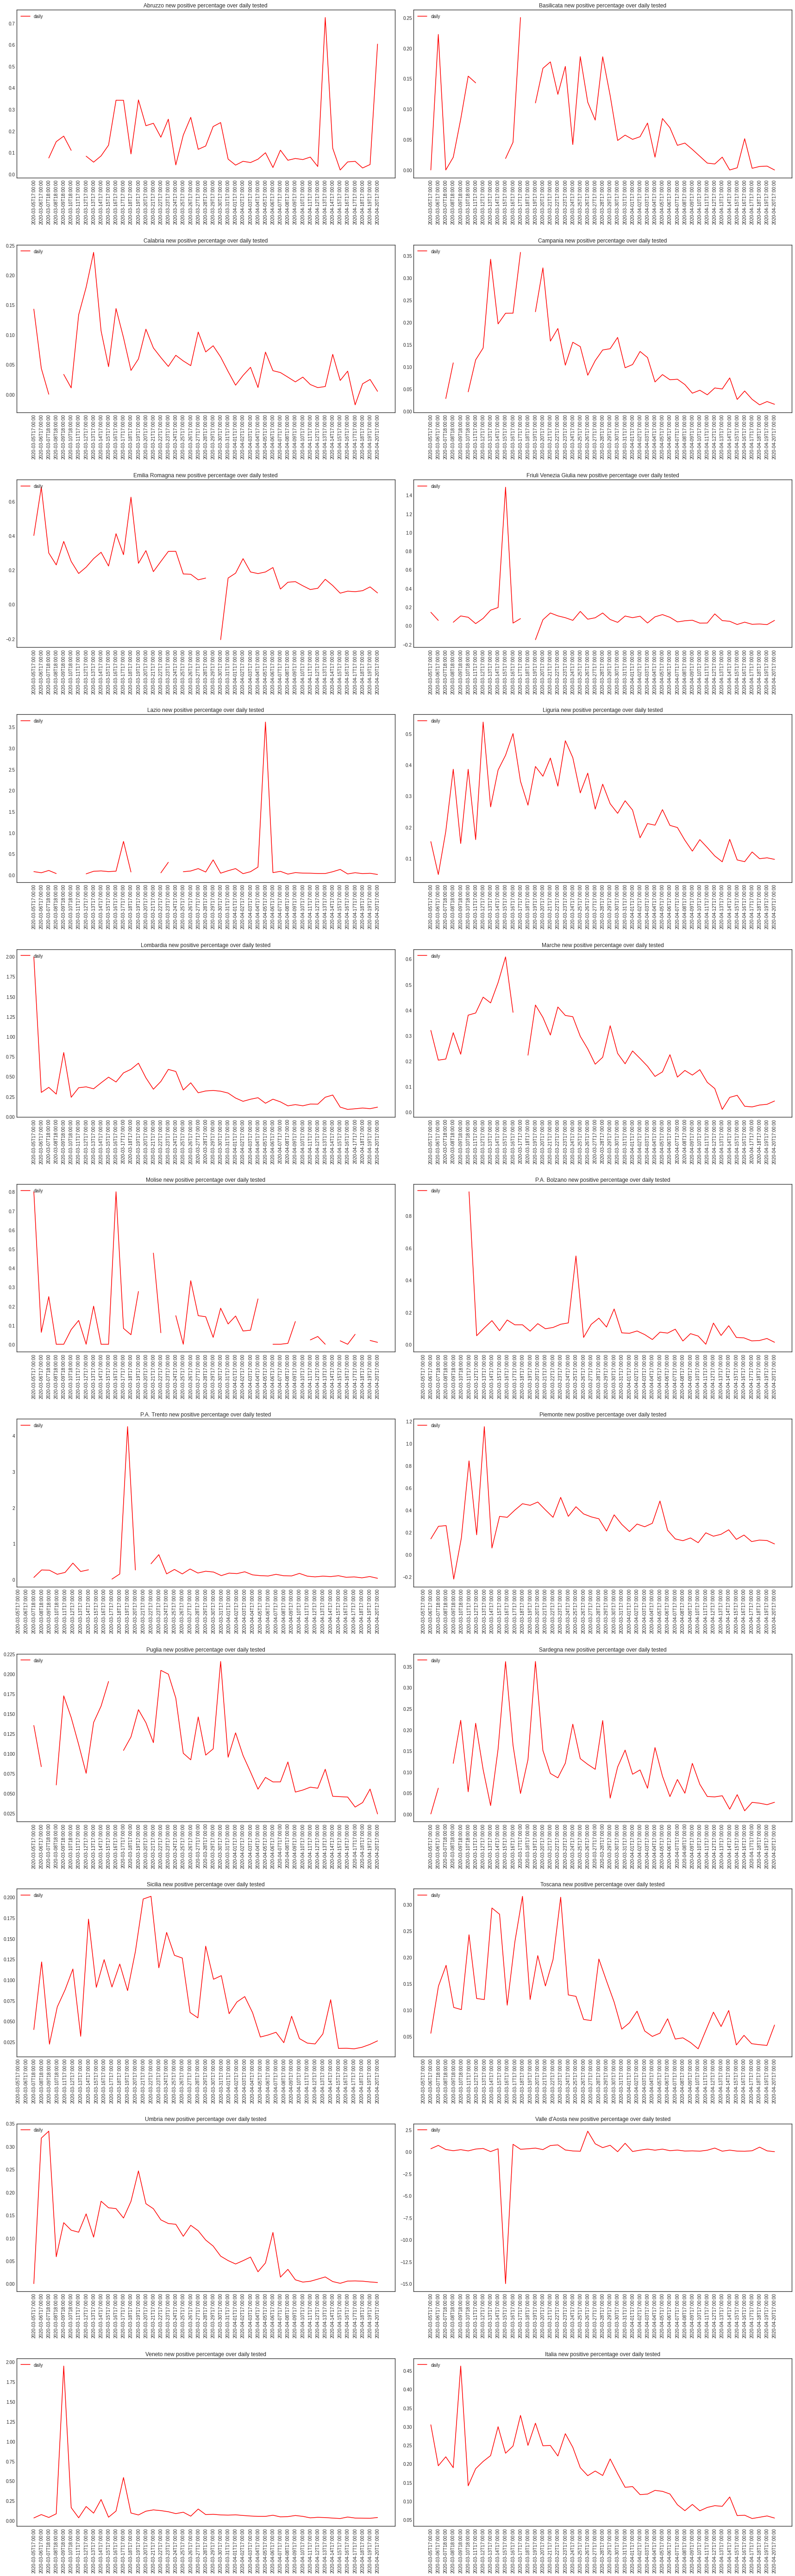

In [18]:
columns = list(italy_tested)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_new_positive_vs_tested = italy_new_positive[[region]]/italy_tested[[region]].diff()
    region_new_positive_vs_tested.columns = ['Positive_perc']
    region_new_positive_vs_tested = region_new_positive_vs_tested[10:]
    ax.plot(region_new_positive_vs_tested.index, region_new_positive_vs_tested['Positive_perc'], '-r', label='daily')
    #ax.plot(region_new_positive_vs_tested.index, region_new_positive_vs_tested['Positive_perc'].rolling(window=5).mean(), '--k', label='rolling window (5 days)')
    ax.set_title(region + ' new positive percentage over daily tested')
    ax.set_xticklabels(region_new_positive_vs_tested.index,rotation=90)
    ax.legend(loc='upper left', frameon=False)
    i=i+1


Continua la controtendenza macroscopica ma discontinua in Abruzzo ma potrebbe trattarsi di un problema legato ad un basso numero di test effettuati. Lombardia e Piemonte sono le regioni col maggior numero di positivi in rapporto al numero di tamponi eseguiti. Fenomeno poco spiegabile se non con l'ipotesi che il contagio avvenga negli unici posti chiusi dove si possa verificare qualche assembramento, ossia aziende, supermercati, negozi e ascensori, dove non tutti indossano la mascherina.


In [19]:
italy_tested['Liguria'].diff().loc[last_day]

1456.0

In [20]:
italy_new_positive['Liguria'].loc[last_day]

141

**Quanti positivi ci sono in totale?**

Studiamo il caso del Veneto e generalizziamolo

In [21]:
veneto_positive_vs_tested = italy_new_positive['Veneto']/italy_tested['Veneto'].diff()
veneto_positive_vs_tested.rolling(window=5).mean()

date
2020-02-24T18:00:00         NaN
2020-02-25T18:00:00         NaN
2020-02-26T18:00:00         NaN
2020-02-27T18:00:00         NaN
2020-02-28T18:00:00         NaN
2020-02-29T17:00:00    0.025421
2020-03-01T17:00:00    0.060427
2020-03-02T18:00:00    0.058182
2020-03-03T18:00:00    0.069111
2020-03-04T17:00:00    0.093980
2020-03-05T17:00:00    0.094109
2020-03-06T17:00:00    0.072921
2020-03-07T18:00:00    0.077990
2020-03-08T18:00:00    0.077789
2020-03-09T18:00:00    0.435995
2020-03-10T18:00:00    0.462045
2020-03-11T17:00:00    0.453982
2020-03-12T17:00:00    0.481586
2020-03-13T17:00:00    0.483258
2020-03-14T17:00:00    0.146849
2020-03-15T17:00:00    0.122687
2020-03-16T17:00:00    0.139688
2020-03-17T17:00:00    0.212712
2020-03-18T17:00:00    0.213001
2020-03-19T17:00:00    0.174084
2020-03-20T17:00:00    0.189268
2020-03-21T17:00:00    0.192163
2020-03-22T17:00:00    0.108781
2020-03-23T17:00:00    0.112003
2020-03-24T17:00:00    0.115356
2020-03-25T17:00:00    0.112753
202

In [22]:
italy_tested['Veneto']

date
2020-02-24T18:00:00      2200
2020-02-25T18:00:00      3780
2020-02-26T18:00:00      4900
2020-02-27T18:00:00      6164
2020-02-28T18:00:00      7414
2020-02-29T17:00:00      8659
2020-03-01T17:00:00      9056
2020-03-02T18:00:00      9782
2020-03-03T18:00:00     10176
2020-03-04T17:00:00     10515
2020-03-05T17:00:00     11949
2020-03-06T17:00:00     13023
2020-03-07T18:00:00     14429
2020-03-08T18:00:00     15918
2020-03-09T18:00:00     15956
2020-03-10T18:00:00     16643
2020-03-11T17:00:00     21400
2020-03-12T17:00:00     23438
2020-03-13T17:00:00     25691
2020-03-14T17:00:00     26980
2020-03-15T17:00:00     32546
2020-03-16T17:00:00     35052
2020-03-17T17:00:00     35478
2020-03-18T17:00:00     40841
2020-03-19T17:00:00     44658
2020-03-20T17:00:00     49288
2020-03-21T17:00:00     53642
2020-03-22T17:00:00     57671
2020-03-23T17:00:00     61115
2020-03-24T17:00:00     66178
2020-03-25T17:00:00     70877
2020-03-26T17:00:00     79759
2020-03-27T17:00:00     83627
2020-

[L'esperimento di Vò Euganeo](https://mattinopadova.gelocal.it/regione/2020/03/07/news/coronavirus-i-risultati-dei-2778-tamponi-a-vo-positivo-il-2-5-1.38563019) ha rilevato che su 2778 tamponi eseguiti a tappeto sulla popolazione del comune, in massima parte eseguiti tra il 25 ed il 29 febbraio, il 2,5% è risultato positivo. 

In tutto il Veneto, fino al giorno 29/2, sono stati totalmente eseguiti 8659 test (tolti quelli di Vò si tratta di test mirati e non a tappeto) e la percentuale di attualmente positivi (media mobile a 5 giorni) viene confermata al 2.5%.

Ipotizziamo allora che la media a 5 giorni del rapporto tra i valori giornalieri dei nuovi positivi e dei test effettuati possa essere utilizzata come stima della percentuale di contagiati totali di una popolazione.

Generalizzando questo esperimento, purtroppo isolato, si può sommariamente stimare che, ipotizzando valido il dato del 29/2 e quindi anche i successivi, la percentuale di contagiati in Veneto all'ultima rilevazione sia del 3.4% (4.6% due giorni fa).

Generalizzando ulteriormente, per l'ultima rilevazione e in una media mobile di 5 giorni, i dati sono quelli visualizzati nel precedente grafico e, nel dettaglio:

In [23]:
italy_positive_vs_tested = italy_new_positive/italy_tested.diff()
italy_positive_vs_tested.rolling(window=5).mean().loc[last_day]

denominazione_regione
Abruzzo                  0.157829
Basilicata               0.013238
Calabria                 0.013674
Campania                 0.024693
Emilia Romagna           0.079673
Friuli Venezia Giulia    0.026763
Lazio                    0.030763
Liguria                  0.101535
Lombardia                0.100472
Marche                   0.029052
Molise                        NaN
P.A. Bolzano             0.027833
P.A. Trento              0.057853
Piemonte                 0.127706
Puglia                   0.038991
Sardegna                 0.022064
Sicilia                  0.020111
Toscana                  0.045634
Umbria                   0.004690
Valle d'Aosta            0.153524
Veneto                   0.034626
Italia                   0.057252
Name: 2020-04-20T17:00:00, dtype: float64

In Italia, quindi, estendendo il caso Veneto, il 5.7% (8.5% cinque giorni fa) della popolazione sarebbe contagiato (in Lombardia, Valle d\'Aosta, Liguria, Abruzzo e Piemonte la percentuale varia tra il 10% ed il 15%). Sembra un dato esagerato ma si segnala lo [studio dell'Imperial College](https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-Europe-estimates-and-NPI-impact-30-03-2020.pdf) secondo il quale la percentuale sarebbe, al 30 marzo, del 9.8%, quindi dello stesso ordine di grandezza.

[Altri studi](https://www.repubblica.it/cronaca/2020/04/06/news/coronavirus-253286203/?ref=RHPPLF-BH-I253289448-C8-P3-S1.8-T1) ipotizzano 5-6 milioni di contagiati, confermando quindi l'ordine di grandezza del 10%

Vediamo l'andamento di questa curva

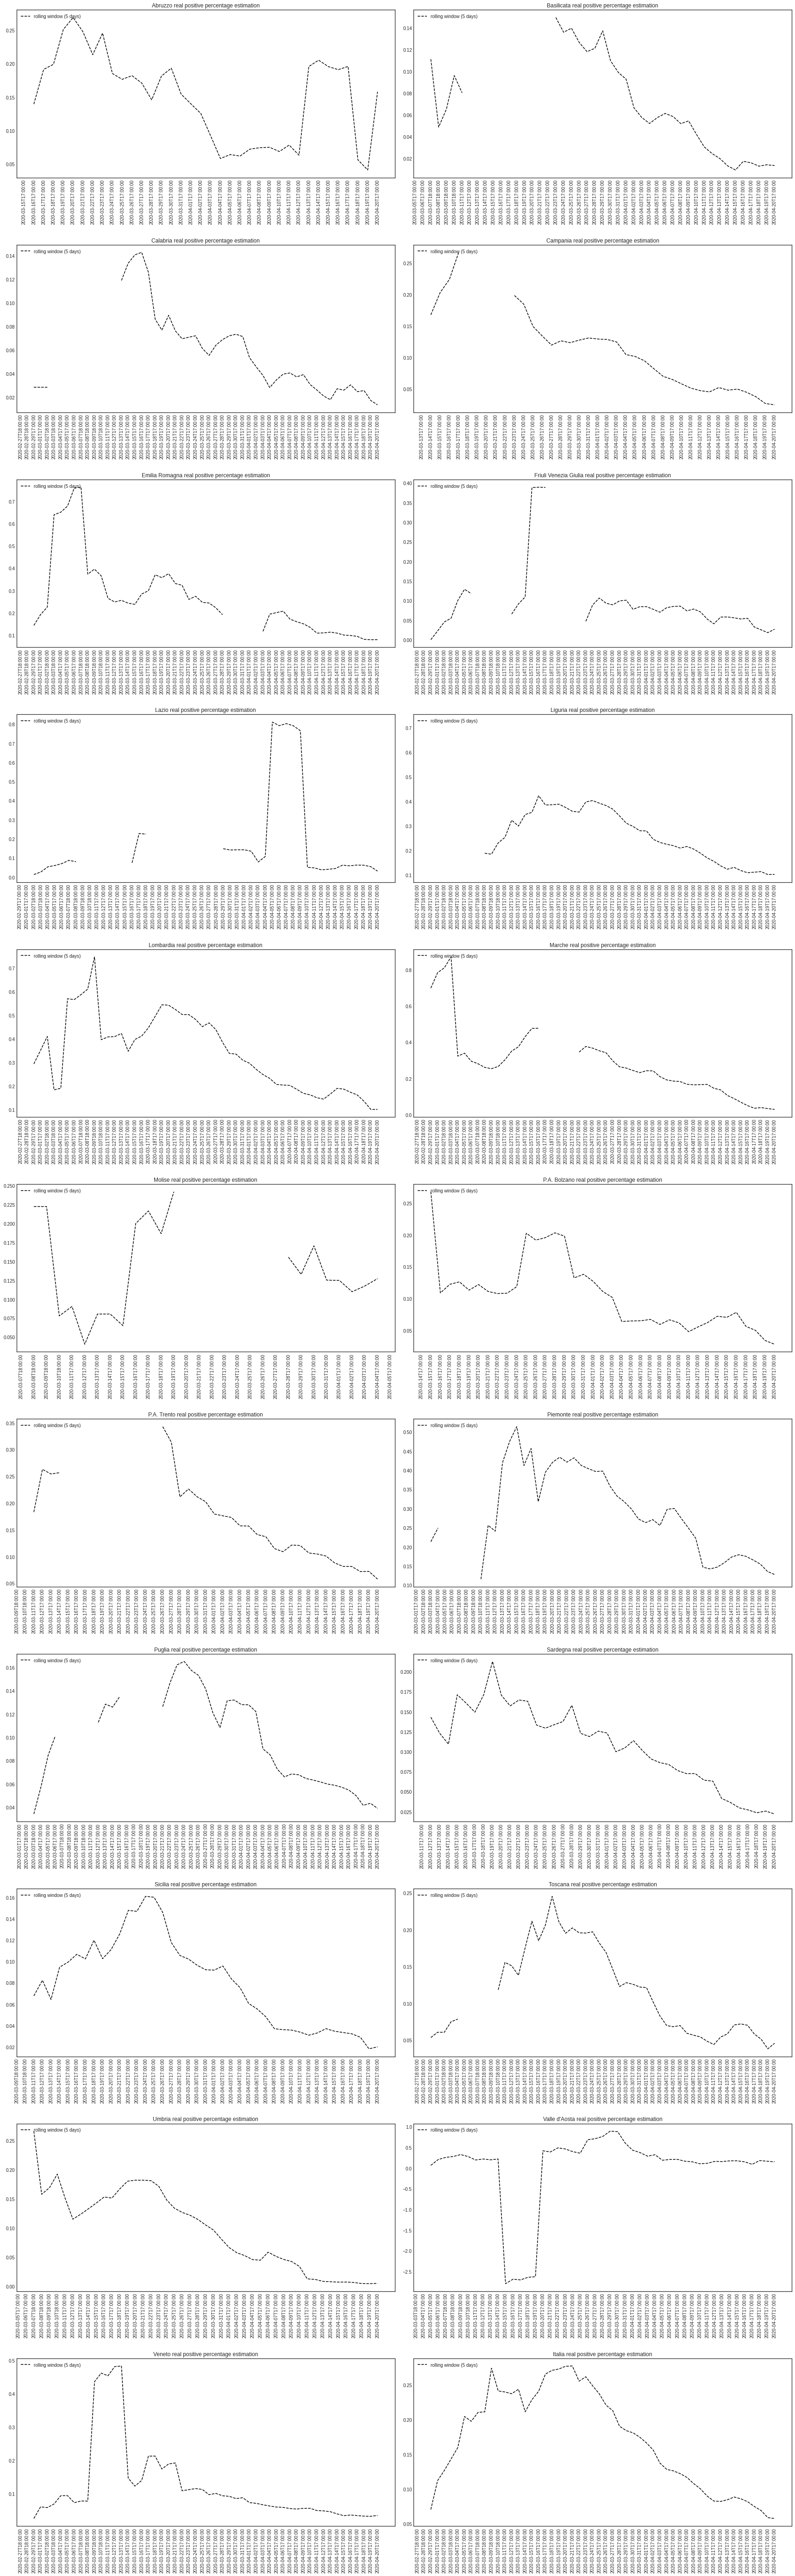

In [25]:
columns = list(italy_tested)
i=1
#first_interesting = 0
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_positive_vs_tested = italy_positive_vs_tested[[region]]
    #region_positive_vs_tested = region_positive_vs_tested[first_interesting:]
    region_positive_vs_tested.columns = ['tested']
    #region_positive_vs_tested = region_positive_vs_tested[first_interesting:]
    #ax.plot(region_positive_vs_tested.index, region_positive_vs_tested['tested'], '-r', label='daily')
    ax.plot(region_positive_vs_tested.index, region_positive_vs_tested['tested'].rolling(window=5).mean(), '--k', label='rolling window (5 days)')
    ax.set_title(region + ' real positive percentage estimation')
    ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
    plt.legend(loc="upper left", prop={'size': 10})
    i=i+1

Diamo anche un'occhiata all'andamento dei test

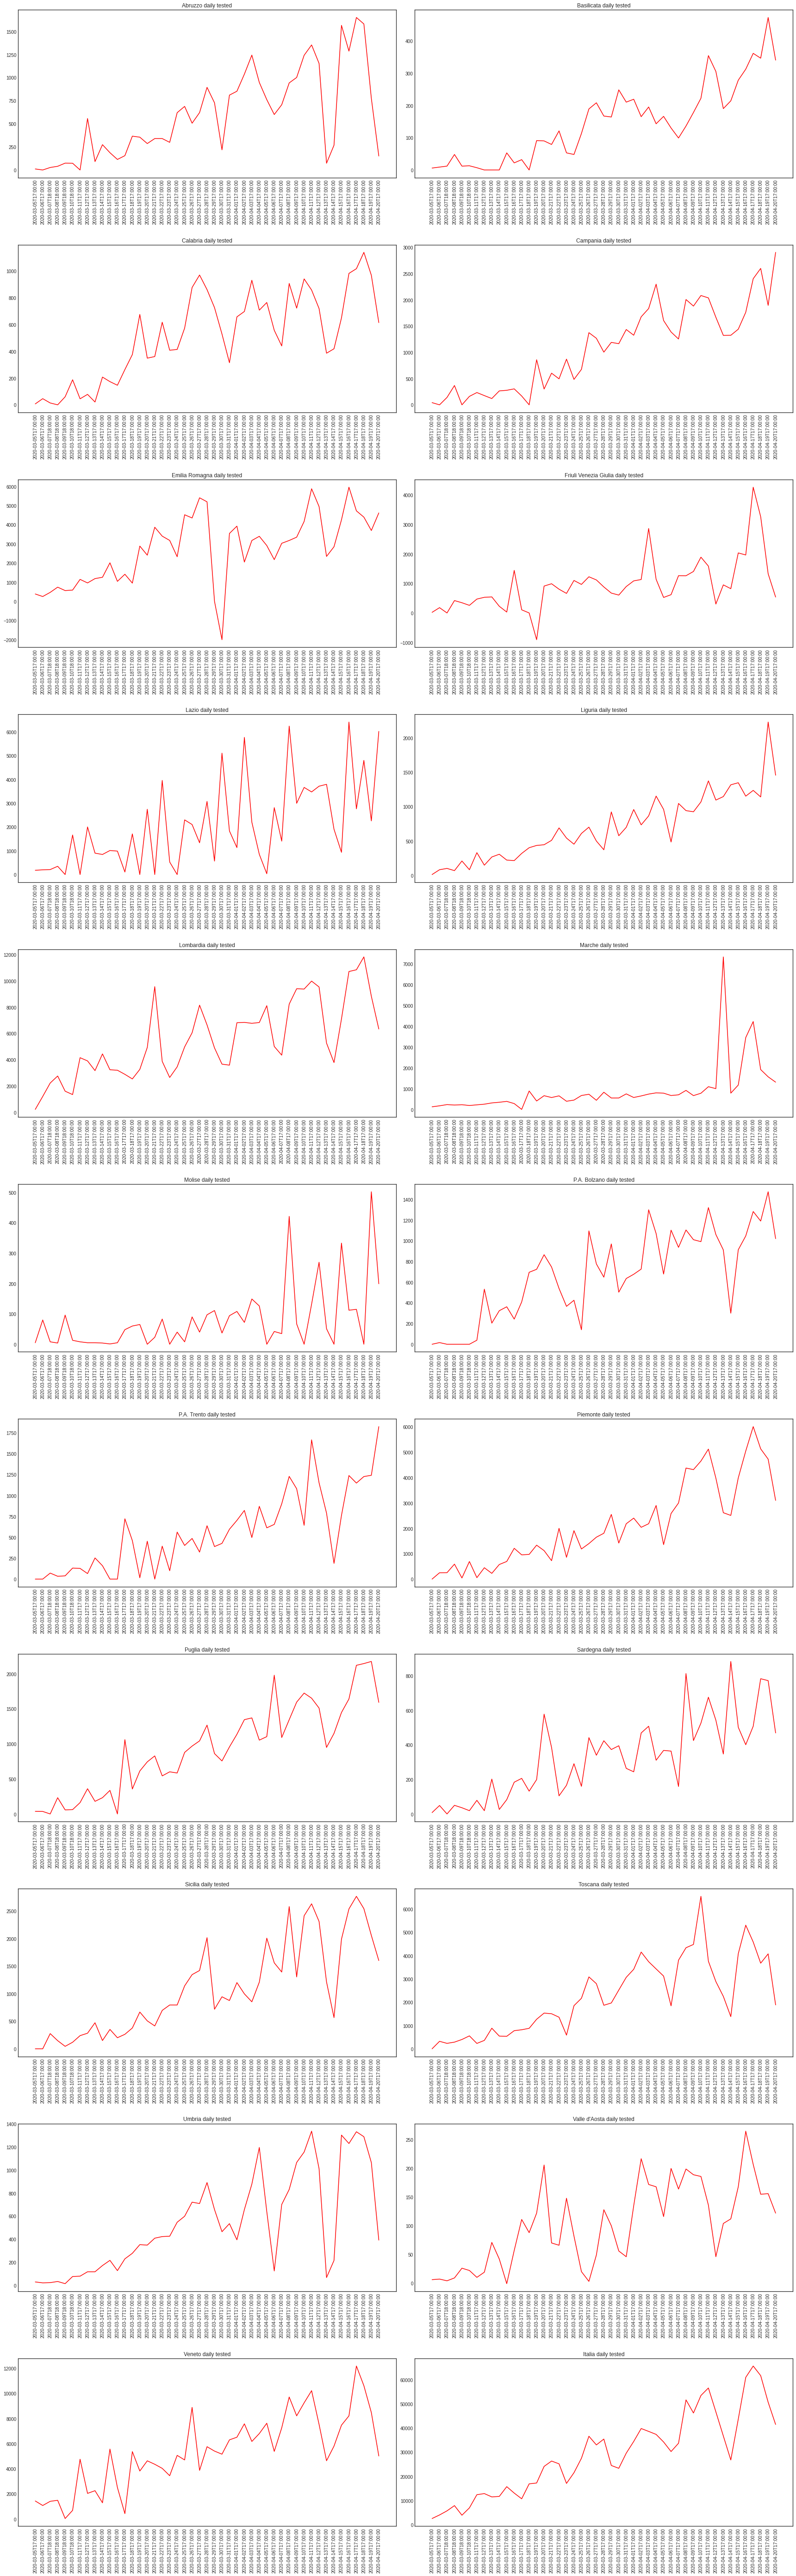

In [26]:
columns = list(italy_tested)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_daily_tested = italy_tested[[region]].diff()
    region_daily_tested.columns = ['tested']
    region_daily_tested = region_daily_tested[10:]
    ax.plot(region_daily_tested.index, region_daily_tested['tested'], '-r', label='daily')
    ax.set_title(region + ' daily tested')
    ax.set_xticklabels(region_new_positive_vs_tested.index,rotation=90)
    i=i+1


Il numero di test è determinante nel far salire o scendere il numero assoluto di contagi registrati. Tendenzialmente il numero di test eseguiti al giorn  sale ma in modo molto irregolare.

Vediamo infine la relazione tra positivi relativi (ossia rapportato al numero di test), ospedalizzati e deceduti

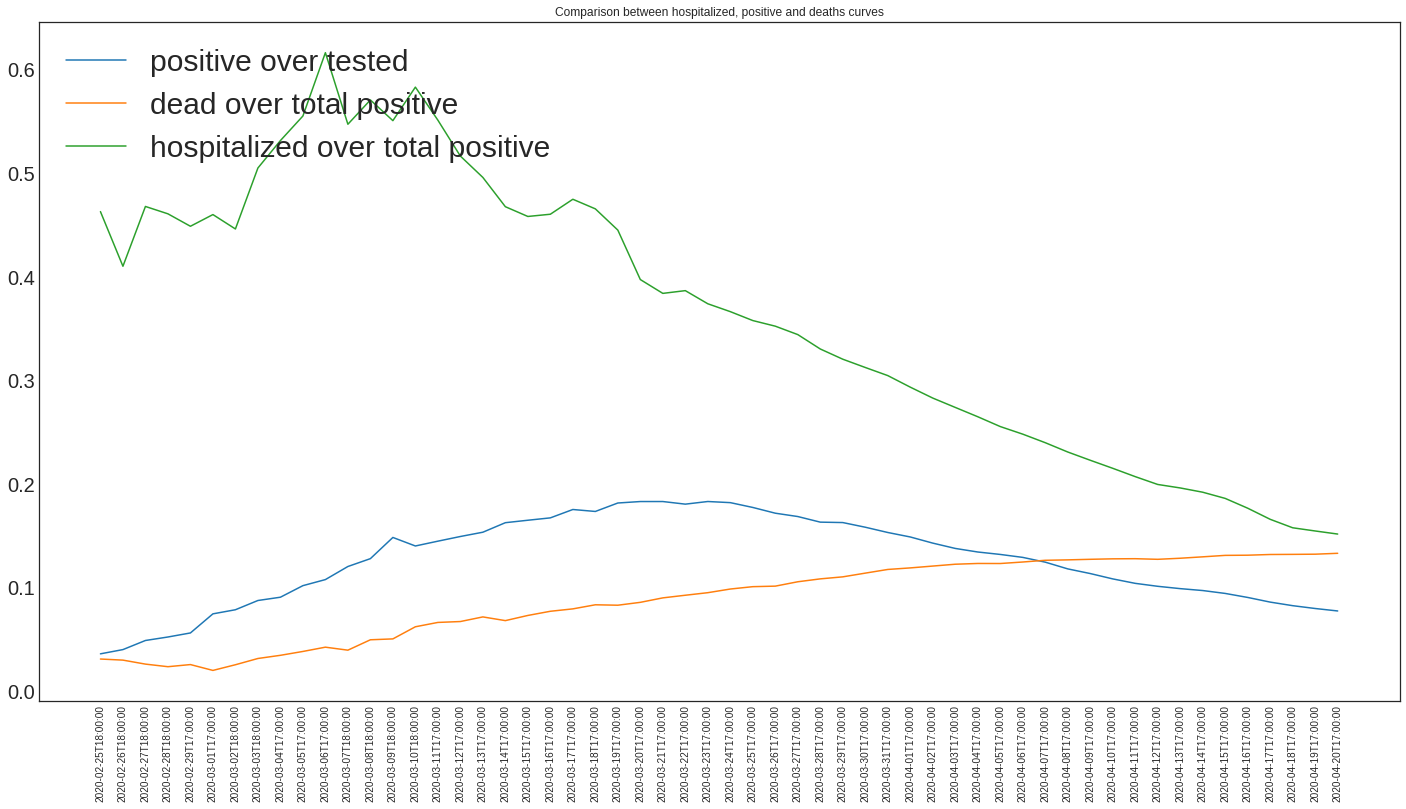

In [27]:
style = dict(size=20, color='gray')
columns = list(italy_tested)
last_day = covid['date'].max()
first_interesting = 1
f = plt.figure(figsize=(50,30))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
italy_positive_vs_tested = italy_currently_positive[['Italia']]/italy_tested[['Italia']]
italy_positive_vs_tested = italy_positive_vs_tested[first_interesting:]
italy_dead_vs_totalpositives = italy_dead[['Italia']]/italy_total_positive[['Italia']]
italy_dead_vs_totalpositives = italy_dead_vs_totalpositives[first_interesting:]
italy_hospitalized_vs_totalpositives = italy_hospitalized[['Italia']]/italy_total_positive[['Italia']]
italy_hospitalized_vs_totalpositives = italy_hospitalized_vs_totalpositives[first_interesting:]
ax.plot(italy_positive_vs_tested.index, italy_positive_vs_tested, label='positive over tested')
ax.plot(italy_dead_vs_totalpositives.index, italy_dead_vs_totalpositives, label='dead over total positive')
ax.plot(italy_hospitalized_vs_totalpositives.index, italy_hospitalized_vs_totalpositives, label='hospitalized over total positive')
#ax.text(italy_new_positive.shape[0]-first_interesting-1, region_positive_vs_tested.rolling(window=5).mean().loc[last_day], region, **style)

ax.set_title('Comparison between hospitalized, positive and deaths curves')
ax.set_xticklabels(italy_dead_vs_totalpositives.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})

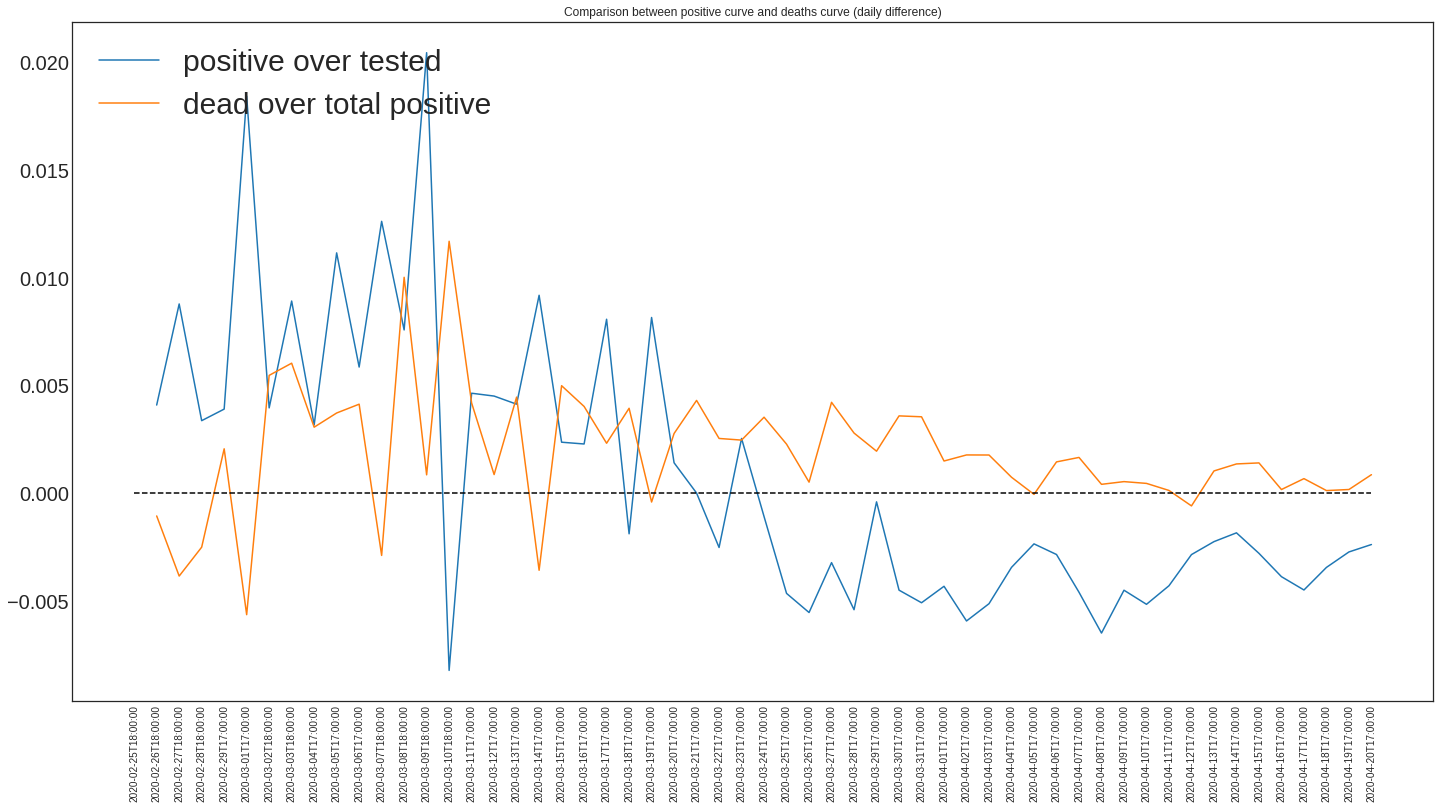

In [28]:
style = dict(size=20, color='gray')
columns = list(italy_tested)
last_day = covid['date'].max()
first_interesting = 1
f = plt.figure(figsize=(50,30))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
italy_positive_vs_tested = italy_currently_positive[['Italia']]/italy_tested[['Italia']]
italy_positive_vs_tested = italy_positive_vs_tested[first_interesting:]
italy_dead_vs_totalpositives = italy_dead[['Italia']]/italy_total_positive[['Italia']]
italy_dead_vs_totalpositives = italy_dead_vs_totalpositives[first_interesting:]
ax.plot(italy_positive_vs_tested.index, italy_positive_vs_tested.diff(), label='positive over tested')
ax.plot(italy_dead_vs_totalpositives.index, italy_dead_vs_totalpositives.diff(), label='dead over total positive')
ax.plot(italy_dead_vs_totalpositives.index, np.zeros(italy_dead_vs_totalpositives.index.size), '--k')

ax.set_title('Comparison between positive curve and deaths curve (daily difference)')
ax.set_xticklabels(italy_dead_vs_totalpositives.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})

La curva dei deceduti è per logica in ritardo rispetto al tasso di positivi.
La derivata dei positivi ha sfondato quota zero il 24/3, quella dei nuovi deceduti non ha ancora sfondato quota 0.
